In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
import warnings
from sklearn.preprocessing import StandardScaler
from math import pi
import seaborn as sns
from matplotlib.gridspec import GridSpec
import os

In [3]:
df = pd.read_csv("/content/drive/MyDrive/SmartManufacturing-DataAnalysis/smart_manufacturing_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   timestamp                 100000 non-null  object 
 1   machine_id                100000 non-null  int64  
 2   temperature               100000 non-null  float64
 3   vibration                 100000 non-null  float64
 4   humidity                  100000 non-null  float64
 5   pressure                  100000 non-null  float64
 6   energy_consumption        100000 non-null  float64
 7   machine_status            100000 non-null  int64  
 8   anomaly_flag              100000 non-null  int64  
 9   predicted_remaining_life  100000 non-null  int64  
 10  failure_type              100000 non-null  object 
 11  downtime_risk             100000 non-null  float64
 12  maintenance_required      100000 non-null  int64  
dtypes: float64(6), int64(5), object(2)
memory usa

In [ ]:
df.head()

,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-01 00:00:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0
1,2025-01-01 00:01:00,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0
2,2025-01-01 00:02:00,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1
3,2025-01-01 00:03:00,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1
4,2025-01-01 00:04:00,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1


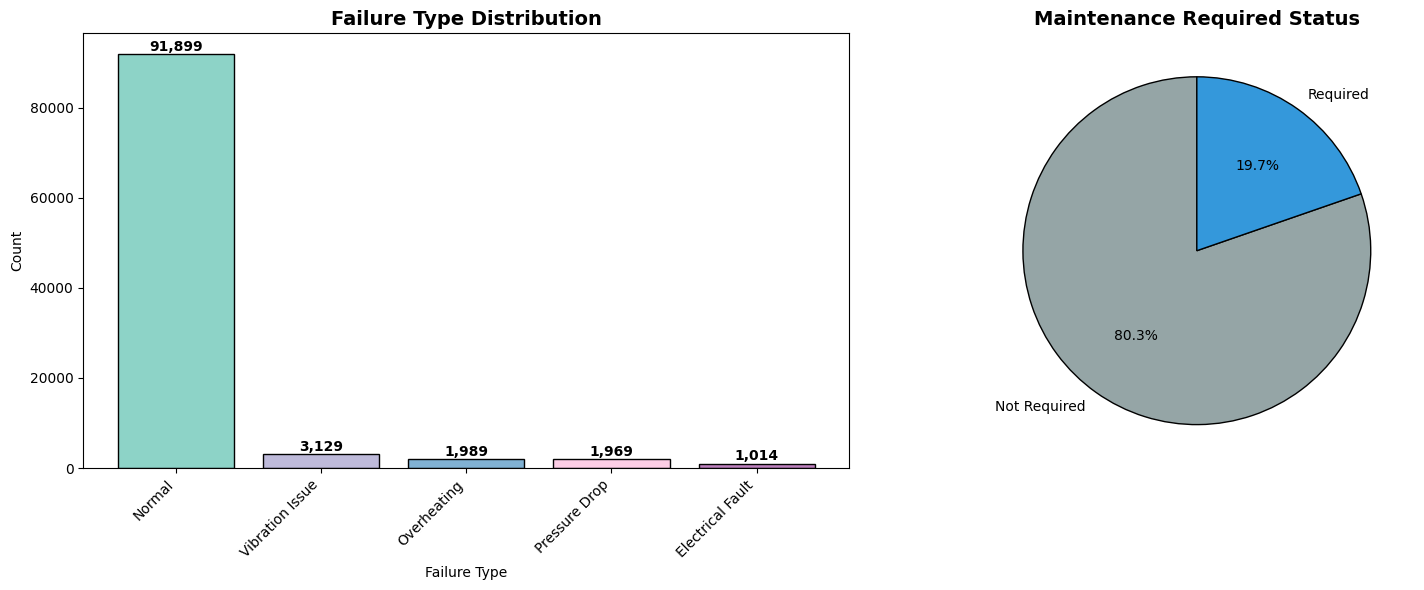

In [ ]:
# 유지보수 시각화 (유지보수가 필요한 개수, 유지보수 실패 유형 시각화)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

failure_counts = df['failure_type'].value_counts()
failure_colors = plt.cm.Set3(np.arange(len(failure_counts))/len(failure_counts))

bars = ax1.bar(range(len(failure_counts)), failure_counts.values,
               color=failure_colors, edgecolor='black')
ax1.set_title('Failure Type Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Failure Type')
ax1.set_ylabel('Count')
ax1.set_xticks(range(len(failure_counts)))
ax1.set_xticklabels(failure_counts.index, rotation=45, ha='right')

for i, (bar, count) in enumerate(zip(bars, failure_counts.values)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

maintenance_pct = df['maintenance_required'].value_counts(normalize=True) * 100
maintenance_labels = ['Not Required', 'Required']
ax2.pie(maintenance_pct, labels=maintenance_labels, autopct='%1.1f%%',
        colors=['#95a5a6', '#3498db'], startangle=90,
        wedgeprops=dict(edgecolor='black'))
ax2.set_title('Maintenance Required Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

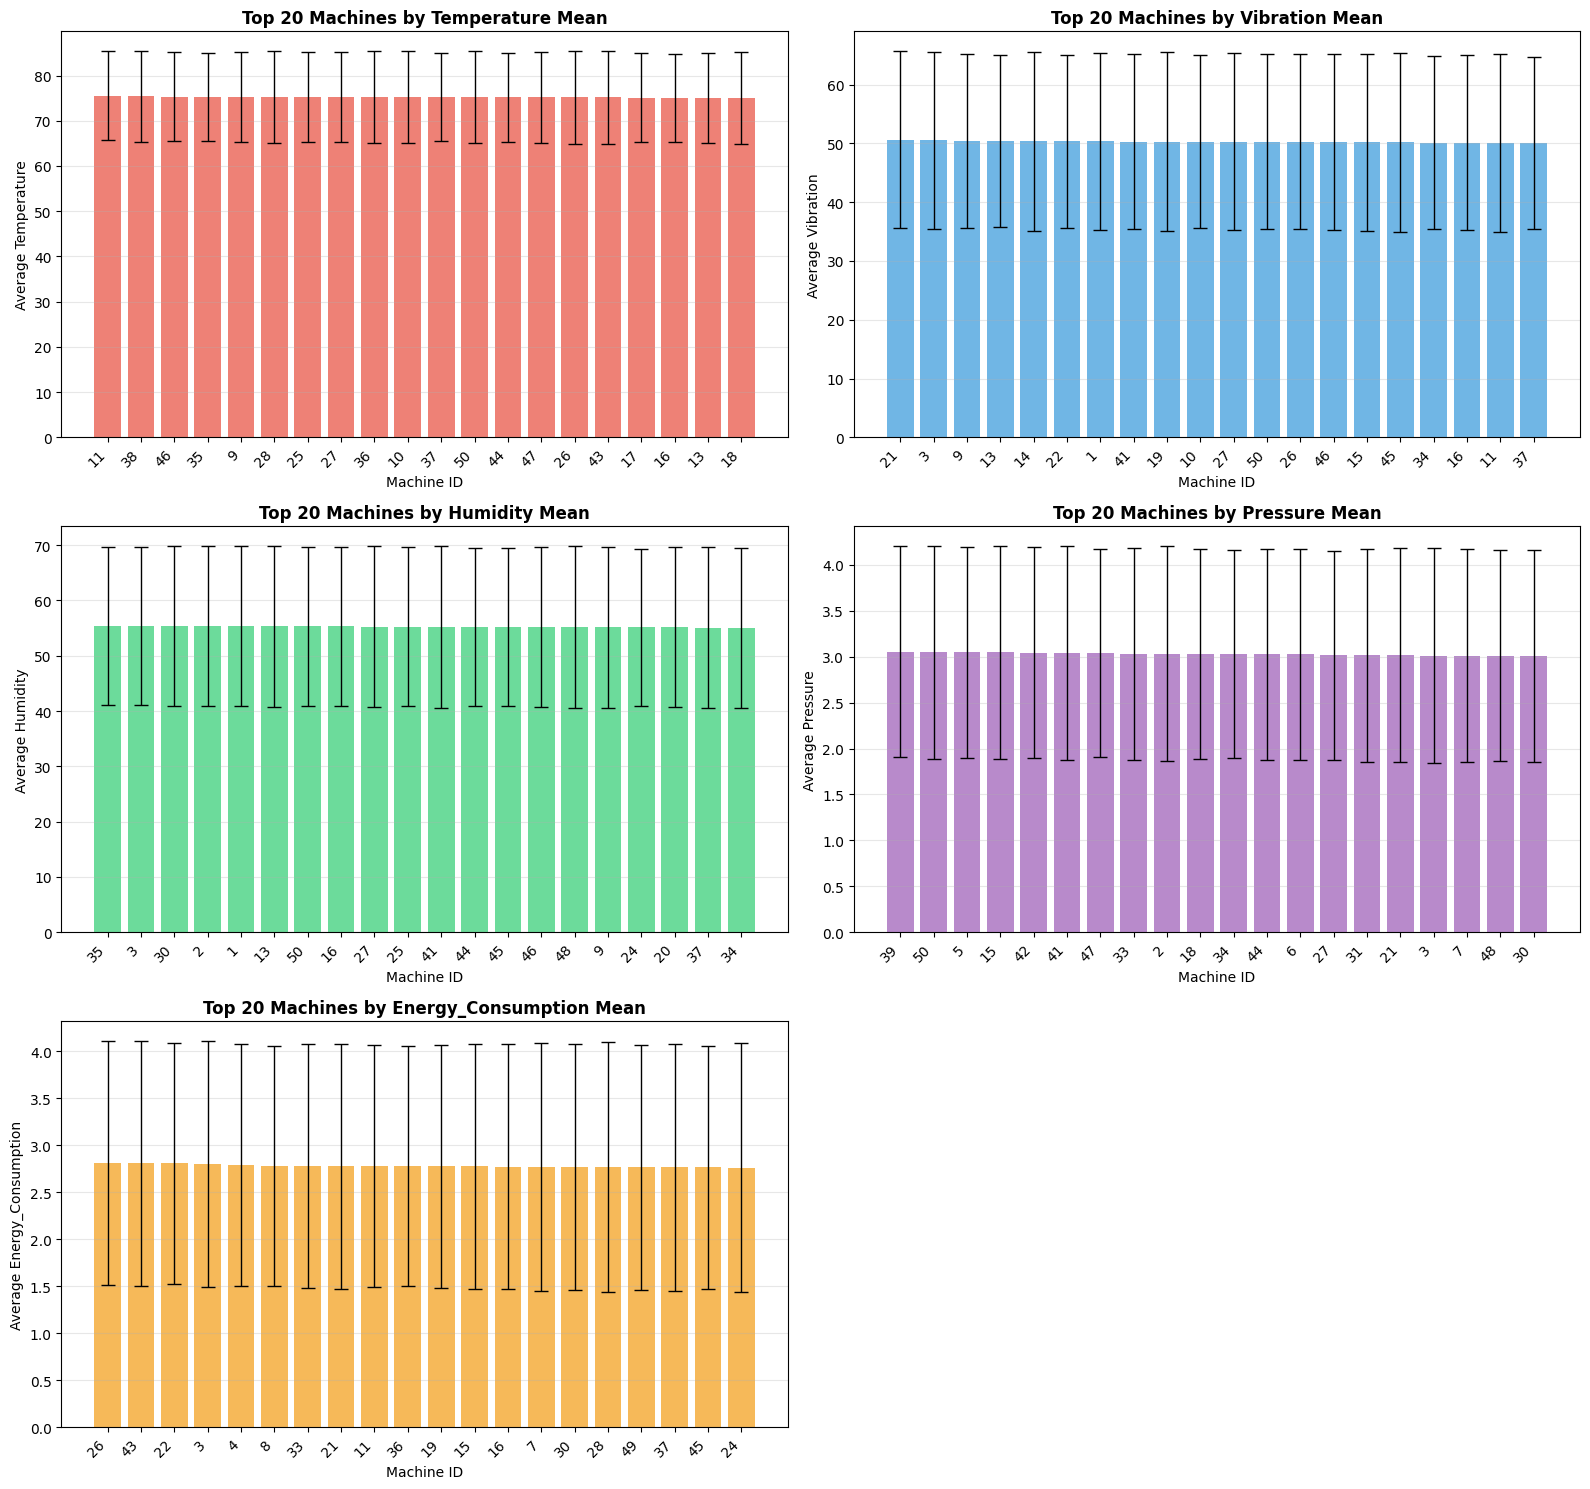

In [ ]:
# 머신 별 시각화
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
axes = axes.flatten()
sensor_metrics = ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption']
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12']

for idx, metric in enumerate(sensor_metrics):
    machine_stats = df.groupby('machine_id')[metric].agg(['mean', 'std', 'max', 'min']).reset_index()
    machine_stats = machine_stats.sort_values('mean', ascending=False).head(20)

    x_pos = np.arange(len(machine_stats))

    axes[idx].bar(x_pos, machine_stats['mean'], color=colors[idx], alpha=0.7,
                 yerr=machine_stats['std'], capsize=5, error_kw={'elinewidth': 1})

    axes[idx].set_title(f'Top 20 Machines by {metric.title()} Mean',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Machine ID')
    axes[idx].set_ylabel(f'Average {metric.title()}')
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(machine_stats['machine_id'], rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3, axis='y')

axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(df['maintenance_required'].value_counts())
print(df['machine_id'].value_counts())

maintenance_required
0    80303
1    19697
Name: count, dtype: int64
machine_id
23    2092
36    2085
45    2080
30    2074
17    2061
26    2059
48    2058
38    2058
44    2054
21    2052
28    2048
29    2044
5     2043
2     2041
13    2040
18    2031
22    2031
32    2031
15    2027
10    2022
42    2019
41    2013
16    2010
4     2004
19    2004
3     2001
47    2001
40    2001
25    1998
39    1993
9     1991
24    1984
20    1970
8     1967
7     1965
37    1964
27    1957
33    1956
12    1955
11    1951
49    1950
34    1948
14    1941
6     1934
31    1933
1     1916
35    1913
50    1912
46    1912
43    1906
Name: count, dtype: int64


In [ ]:
# 기계별로 대기 상태(=0) 몇 번 발생했는지
df[df['machine_status'] == 0].groupby('machine_id').size()

,0
machine_id,
1,200
2,225
3,173
4,189
5,202
6,201
7,203
8,171
9,210


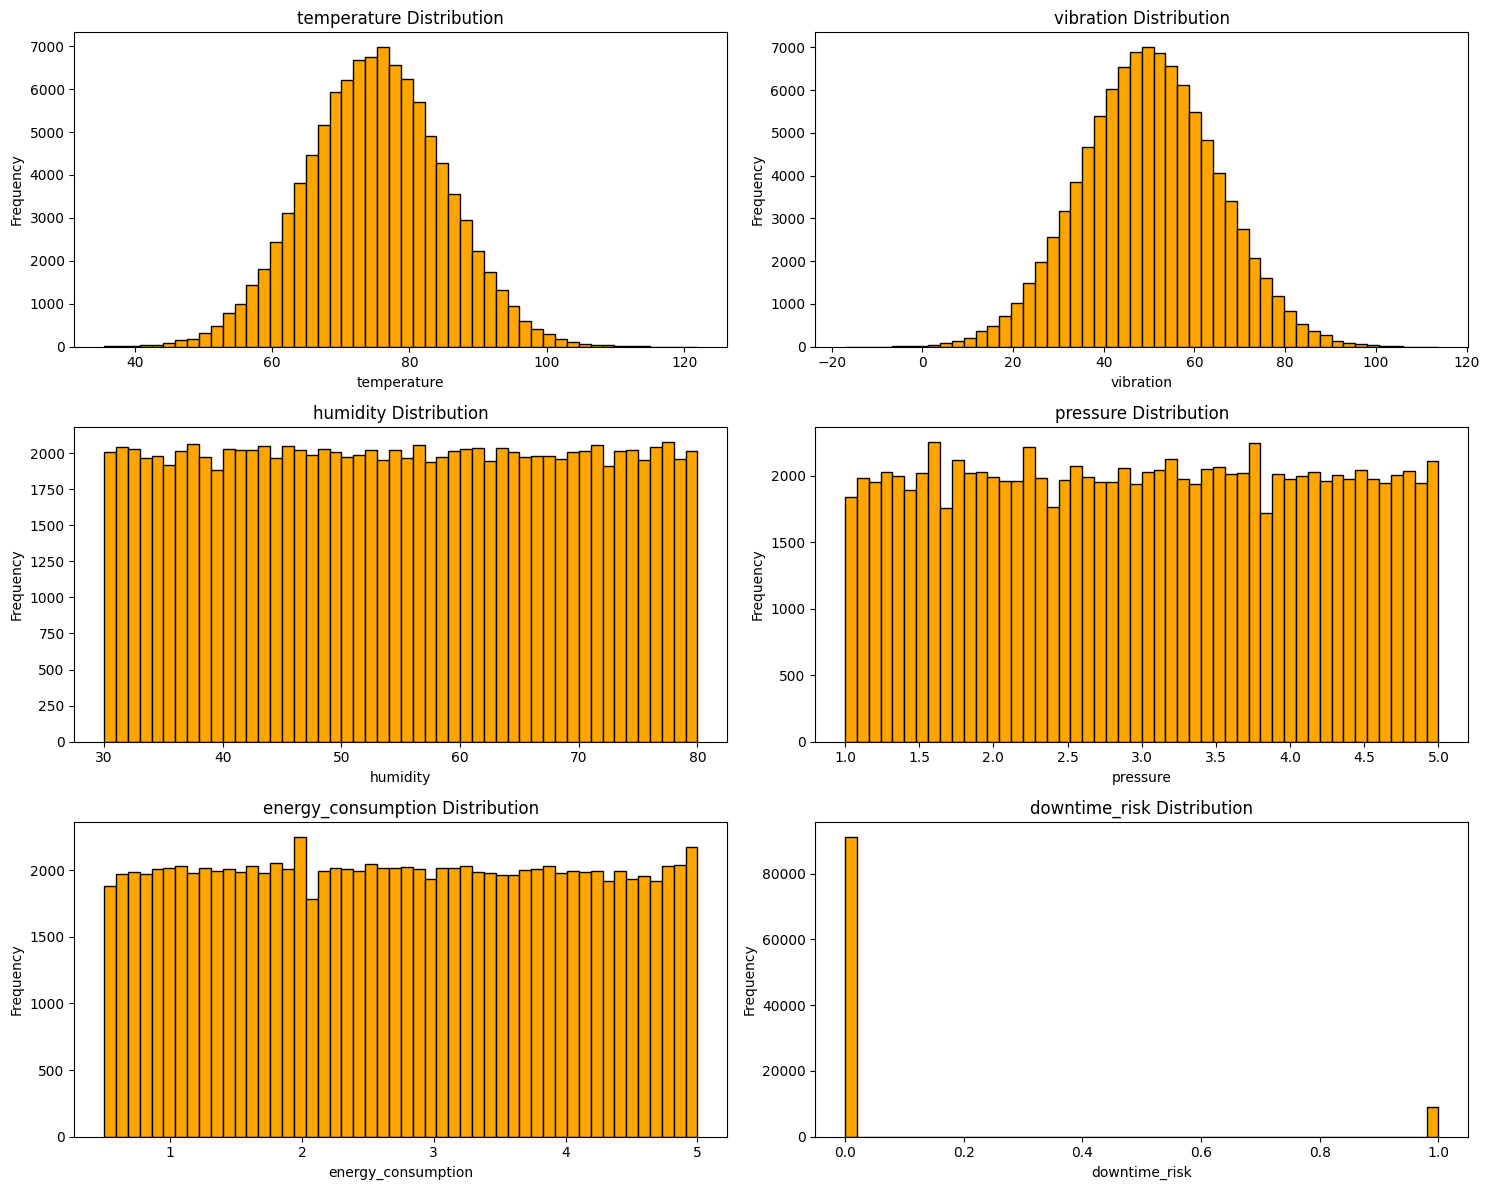

In [ ]:
# 분석할 센서 컬럼 리스트
sensor_columns = ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption','downtime_risk']

# 시각화 시작
plt.figure(figsize=(15, 12))

# 센서별로 반복하며 히스토그램 생성
for i, col in enumerate(sensor_columns, 1):
    plt.subplot(3, 2, i)  # subplot 행, 열 구성 (최대 6개까지)
    plt.hist(df[col], bins=50, edgecolor='black', color='orange')  # 히스토그램
    plt.title(f'{col} Distribution')  # 제목
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # 그래프 간격 자동 조정
plt.show()

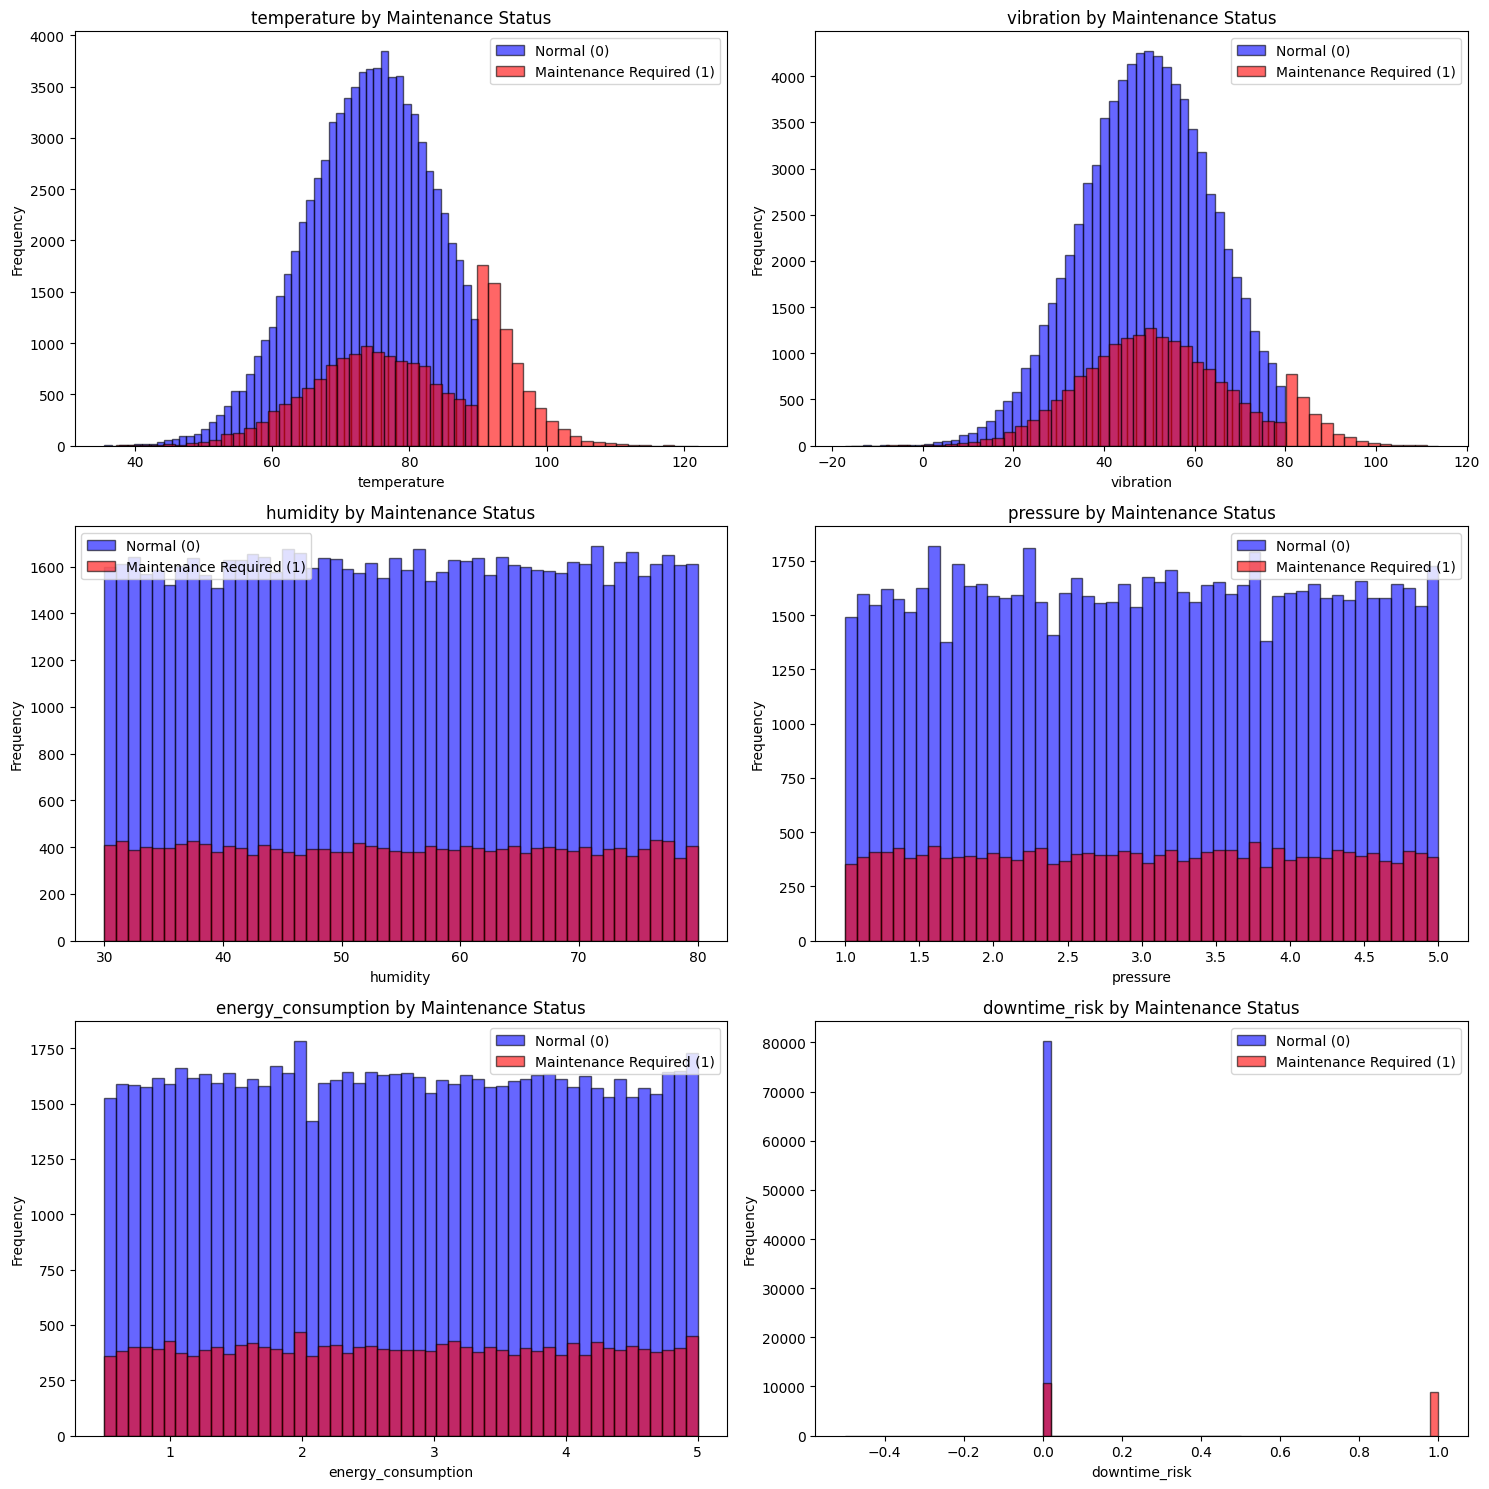

In [ ]:
# 시각화 설정
plt.figure(figsize=(15, 15))

for i, col in enumerate(sensor_columns, 1):
    plt.subplot(3, 2, i)

    # 정상(0), 정비 필요(1) 데이터 나누기
    normal = df[df['maintenance_required'] == 0][col]
    maintenance = df[df['maintenance_required'] == 1][col]

    # 히스토그램 그리기
    plt.hist(normal, bins=50, alpha=0.6, label='Normal (0)', color='blue', edgecolor='black')
    plt.hist(maintenance, bins=50, alpha=0.6, label='Maintenance Required (1)', color='red', edgecolor='black')

    plt.title(f'{col} by Maintenance Status')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

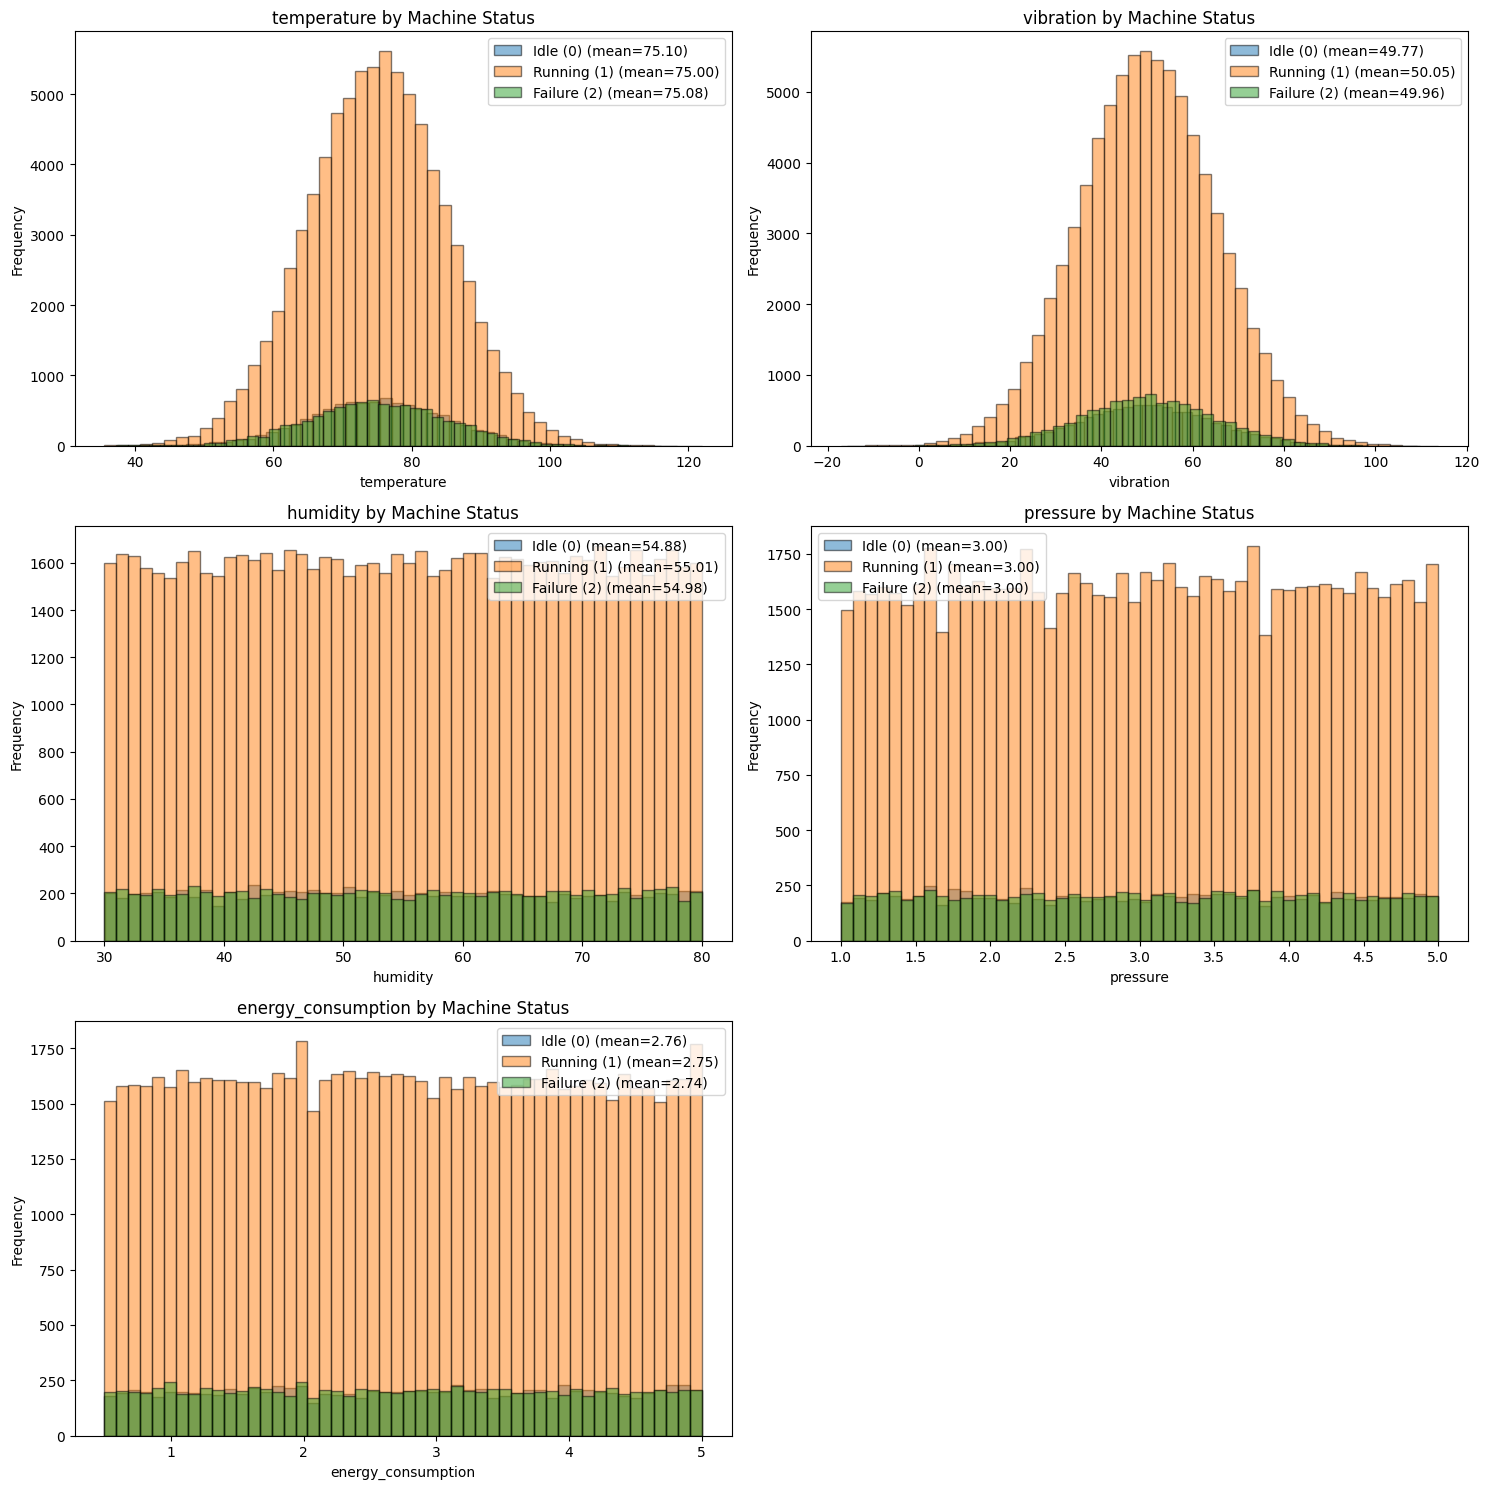

In [ ]:
# 분석할 센서 컬럼 리스트
sensor_columns = ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption']

# 머신 상태 그룹 이름
status_labels = {
    0: 'Idle (0)',
    1: 'Running (1)',
    2: 'Failure (2)'
}

# 시각화
plt.figure(figsize=(15, 15))

for i, col in enumerate(sensor_columns, 1):
    plt.subplot(3, 2, i)

    for status, label in status_labels.items():
        data = df[df['machine_status'] == status][col]
        plt.hist(data, bins=50, alpha=0.5, label=f'{label} (mean={data.mean():.2f})', edgecolor='black')

    plt.title(f'{col} by Machine Status')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

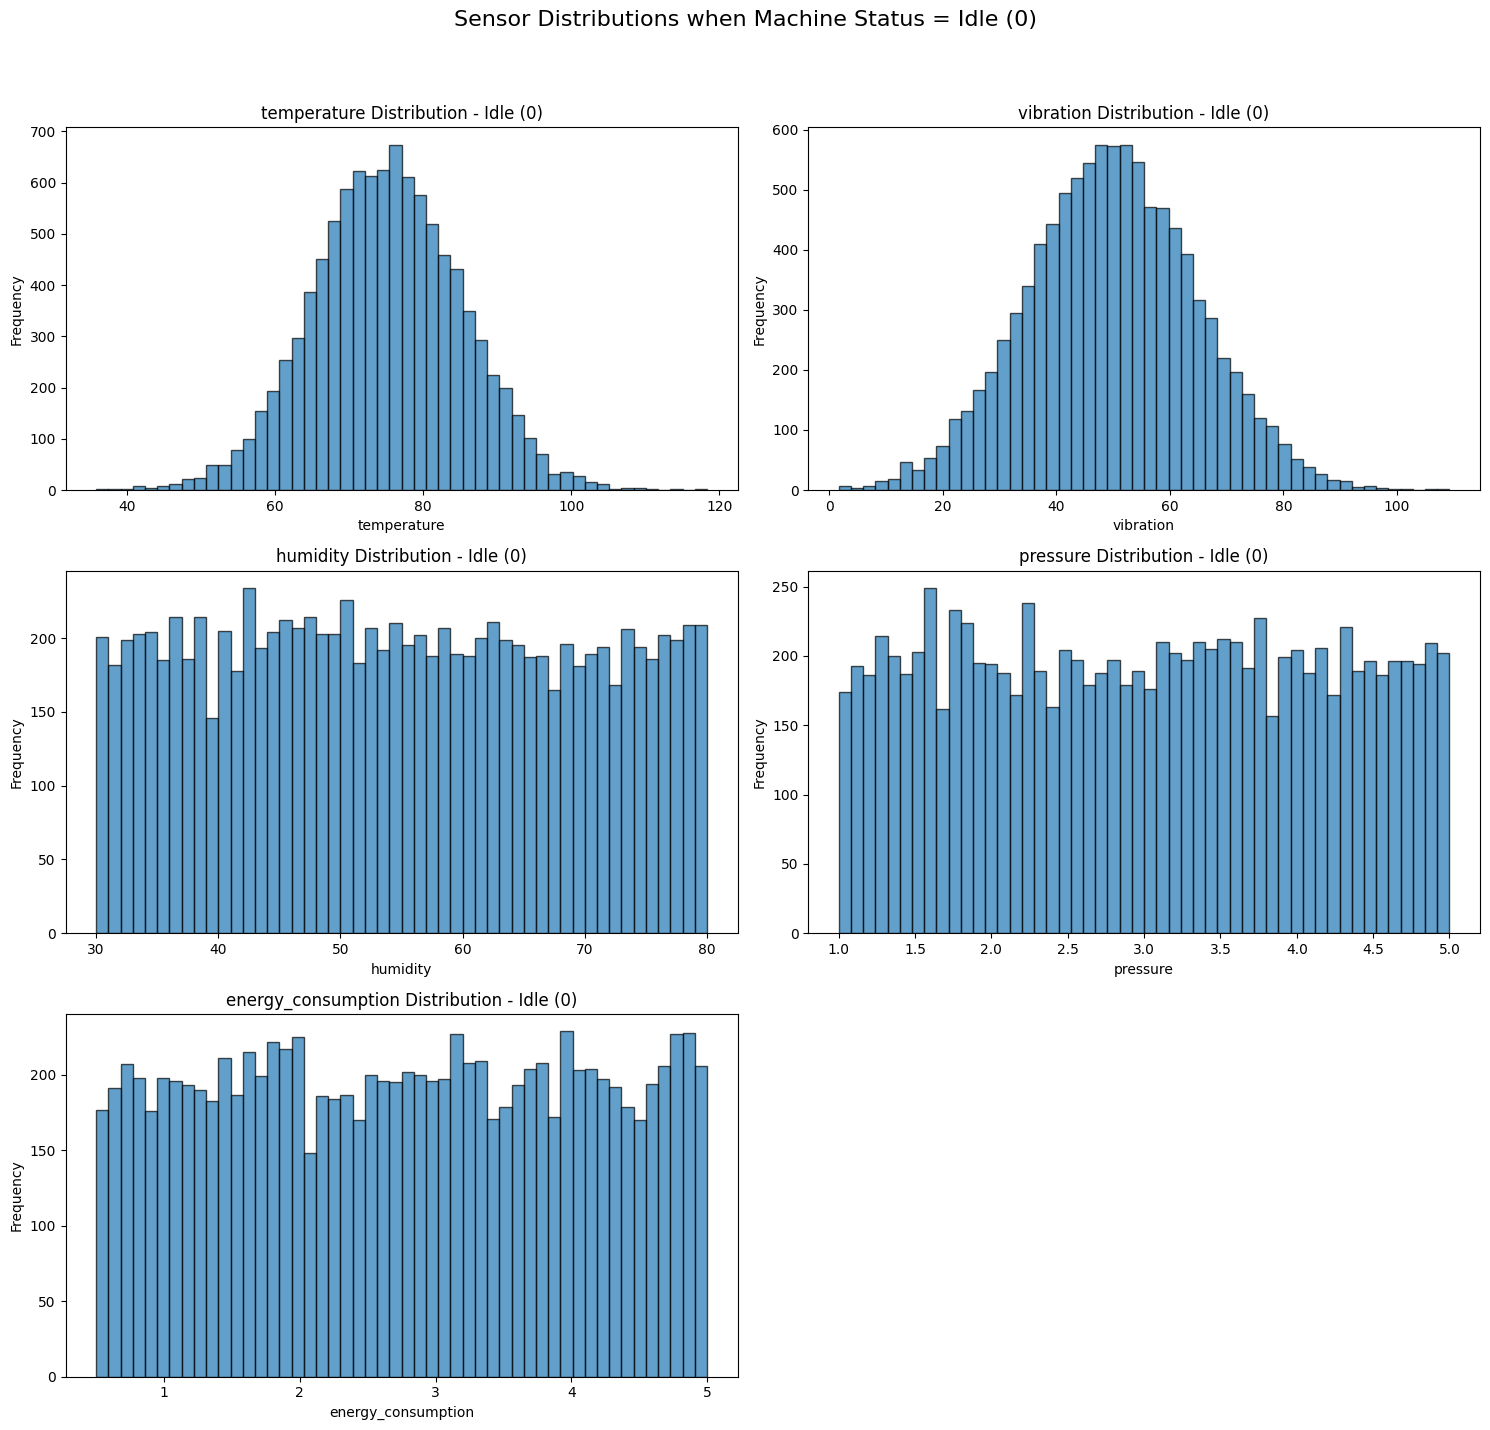

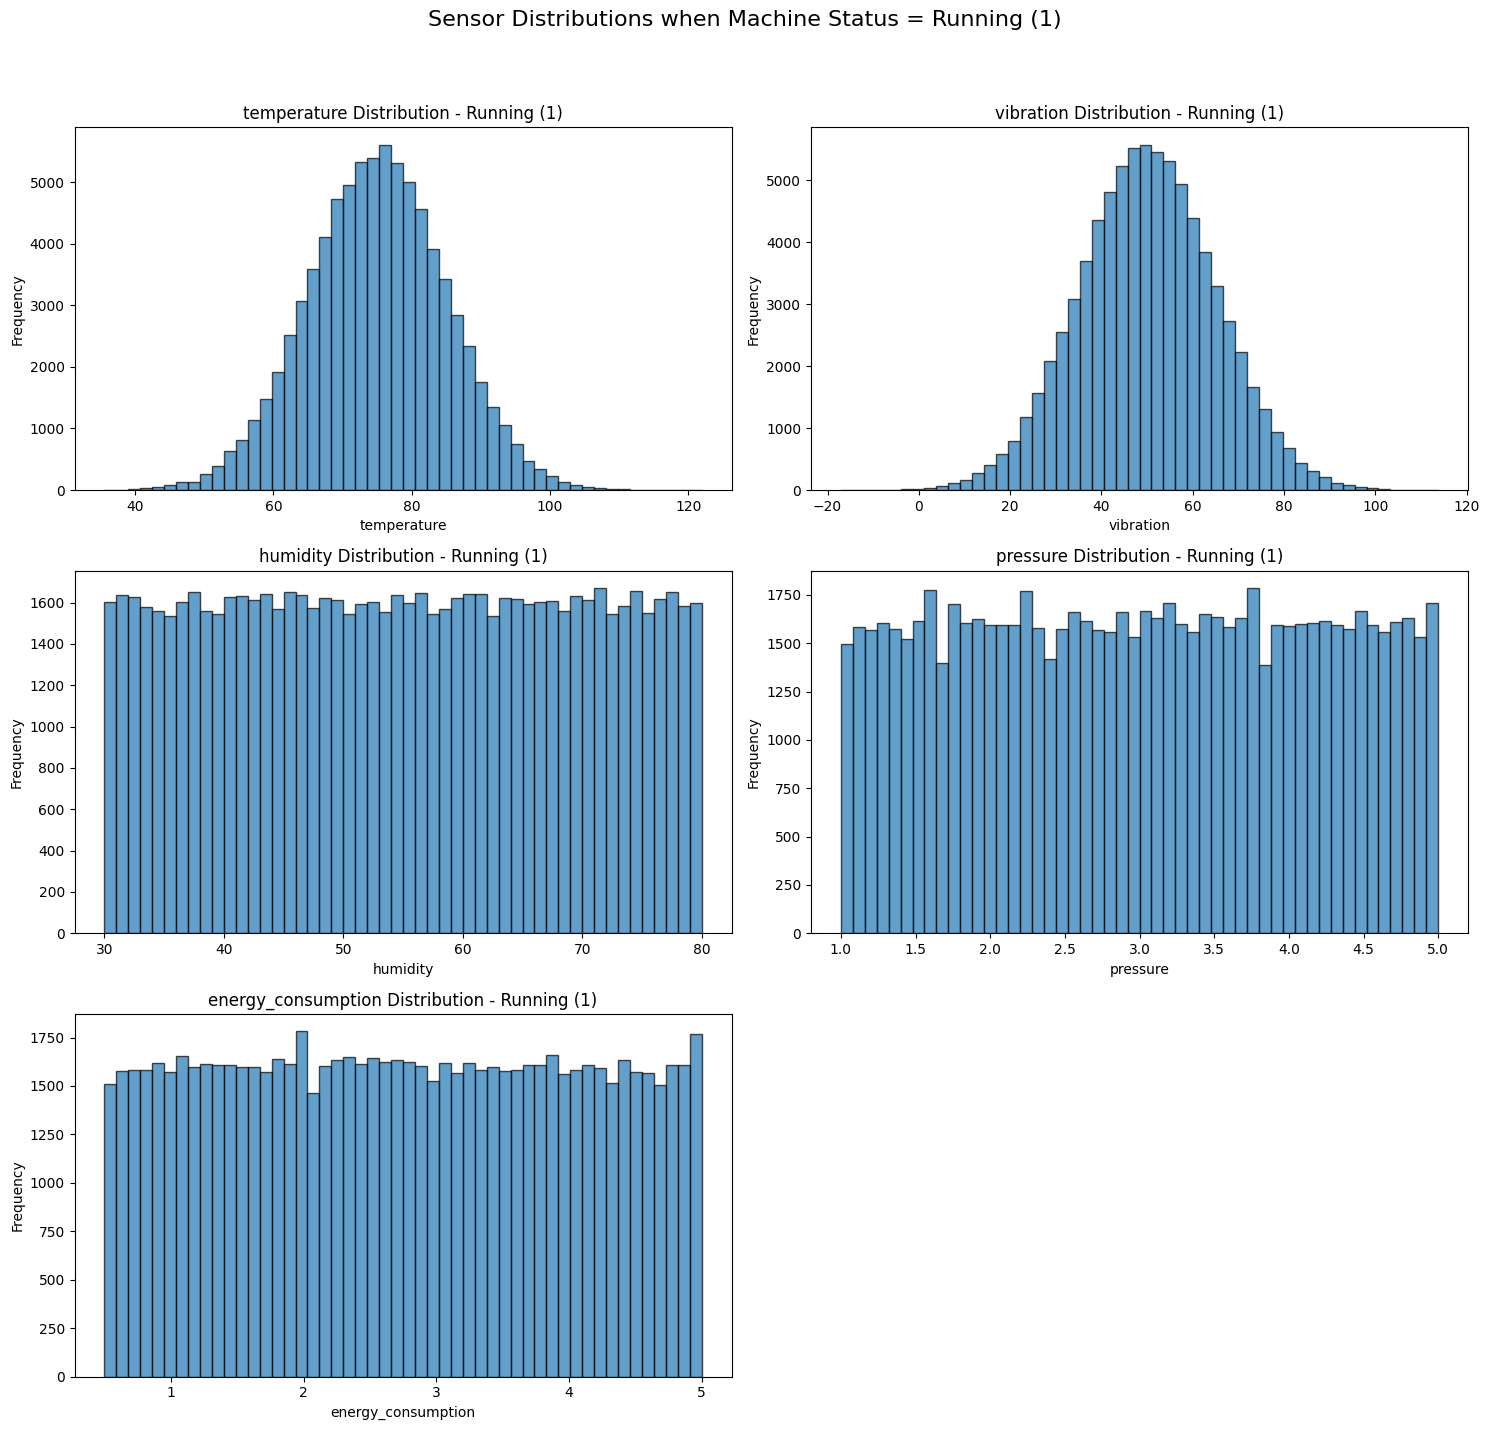

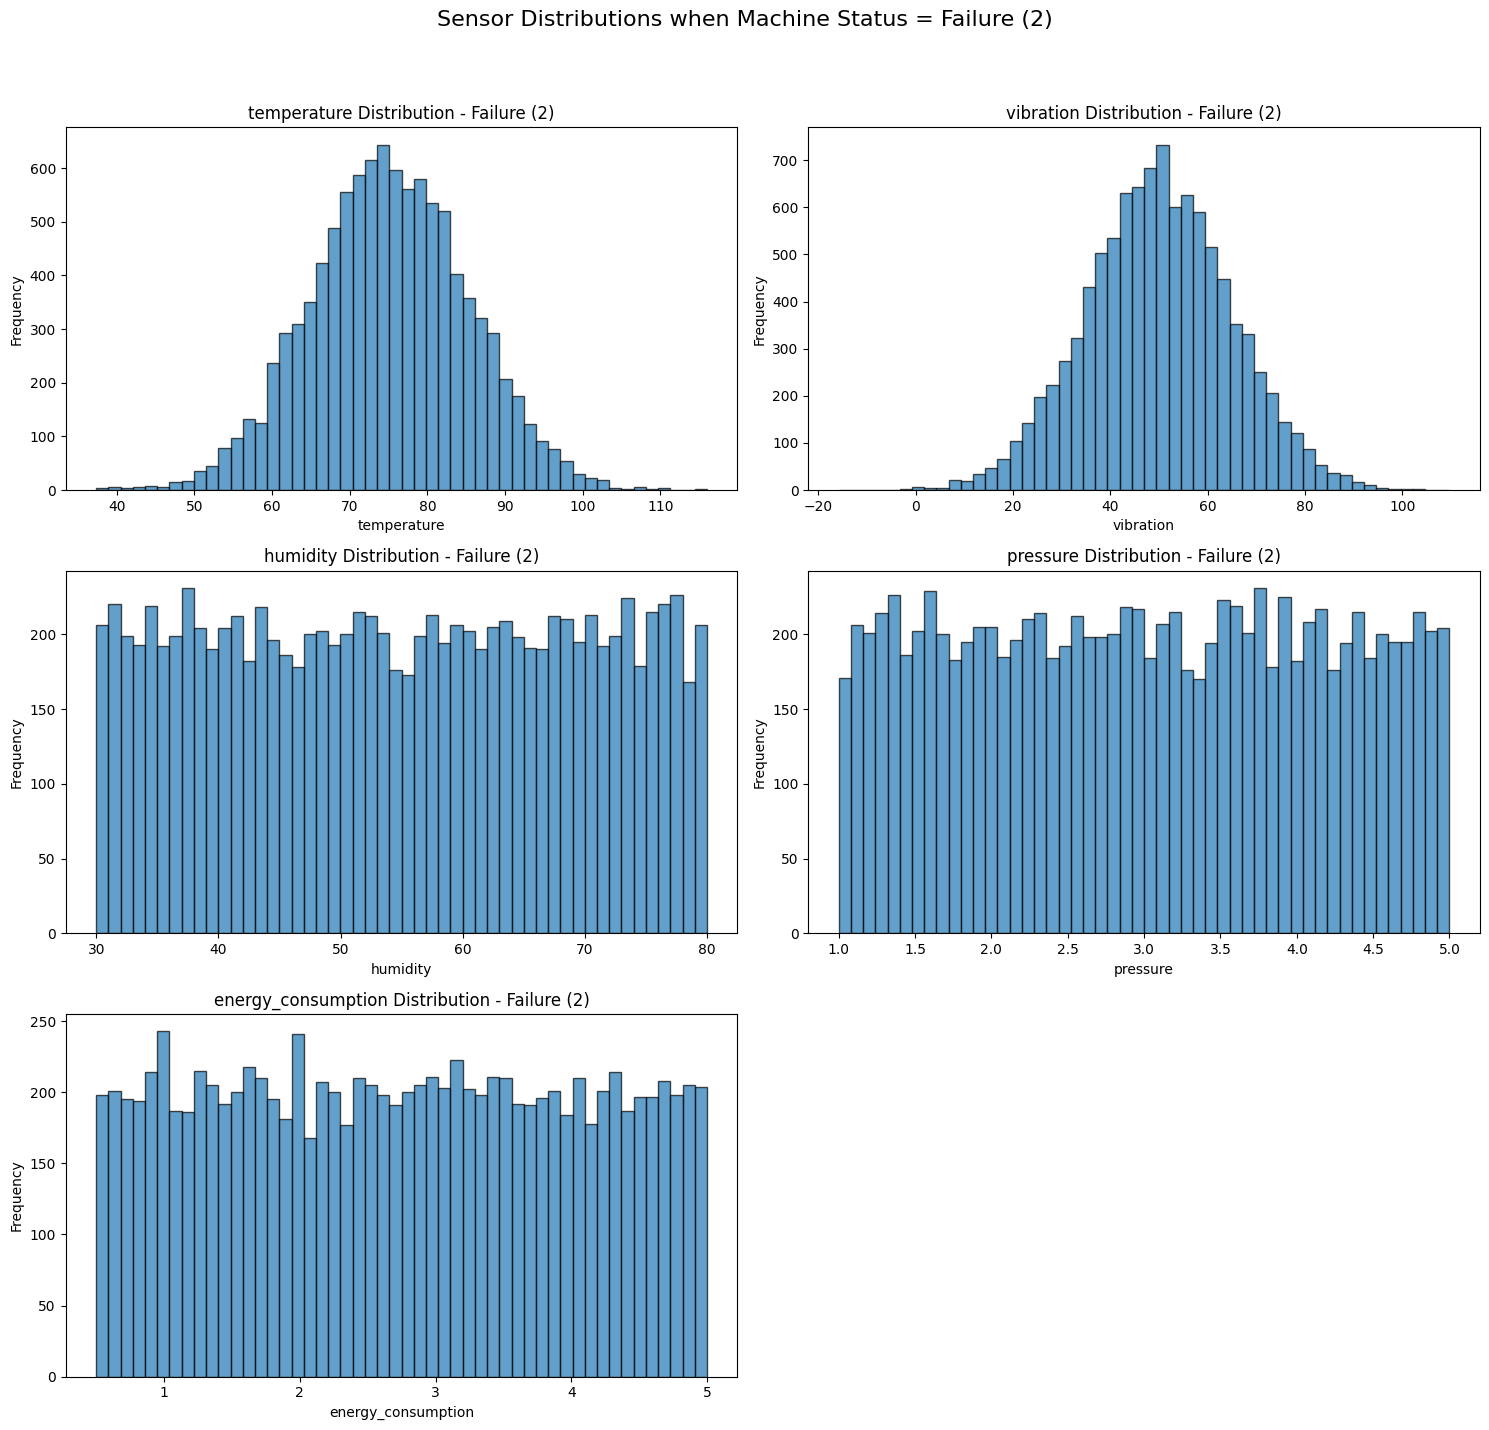

In [ ]:

# 분석할 센서 컬럼 리스트
sensor_columns = ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption']

# 상태별 라벨
status_labels = {
    0: 'Idle (0)',
    1: 'Running (1)',
    2: 'Failure (2)'
}

# 각 machine_status 별로 히스토그램 시각화 반복
for status, label in status_labels.items():
    # 상태에 해당하는 데이터 추출
    subset = df[df['machine_status'] == status]

    # 그림 그리기
    plt.figure(figsize=(15, 15))
    for i, col in enumerate(sensor_columns, 1):
        plt.subplot(3, 2, i)
        plt.hist(subset[col], bins=50, alpha=0.7, edgecolor='black')
        plt.title(f'{col} Distribution - {label}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.suptitle(f'Sensor Distributions when Machine Status = {label}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


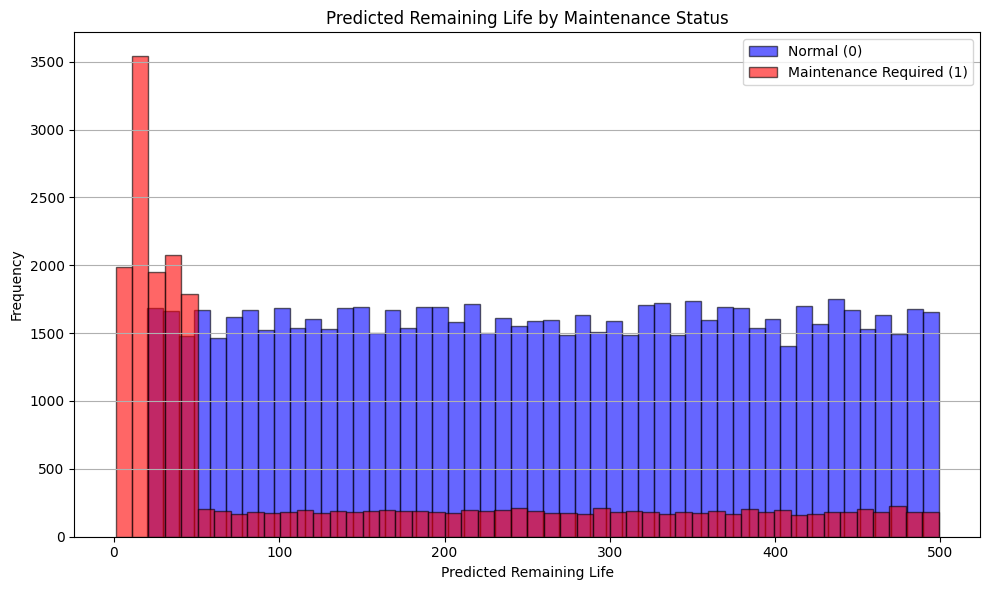

In [ ]:
# 결측치 제거
df = df.dropna(subset=['predicted_remaining_life'])

# maintenance_required 값에 따라 분리
normal_life = df[df['maintenance_required'] == 0]['predicted_remaining_life']
maintenance_life = df[df['maintenance_required'] == 1]['predicted_remaining_life']

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(normal_life, bins=50, alpha=0.6, label='Normal (0)', color='blue', edgecolor='black')
plt.hist(maintenance_life, bins=50, alpha=0.6, label='Maintenance Required (1)', color='red', edgecolor='black')

plt.title('Predicted Remaining Life by Maintenance Status')
plt.xlabel('Predicted Remaining Life')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


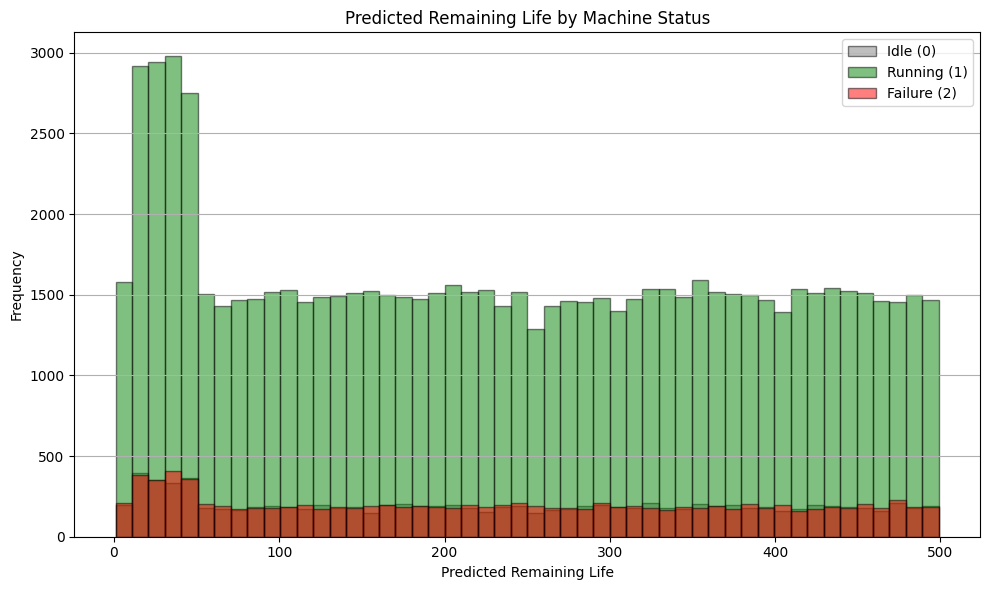

In [ ]:
# 결측치 제거
df = df.dropna(subset=['predicted_remaining_life'])

# 상태별 데이터 분리
life_0 = df[df['machine_status'] == 0]['predicted_remaining_life']  # 대기
life_1 = df[df['machine_status'] == 1]['predicted_remaining_life']  # 작동
life_2 = df[df['machine_status'] == 2]['predicted_remaining_life']  # 고장

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(life_0, bins=50, alpha=0.5, label='Idle (0)', color='gray', edgecolor='black')
plt.hist(life_1, bins=50, alpha=0.5, label='Running (1)', color='green', edgecolor='black')
plt.hist(life_2, bins=50, alpha=0.5, label='Failure (2)', color='red', edgecolor='black')

plt.title('Predicted Remaining Life by Machine Status')
plt.xlabel('Predicted Remaining Life')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


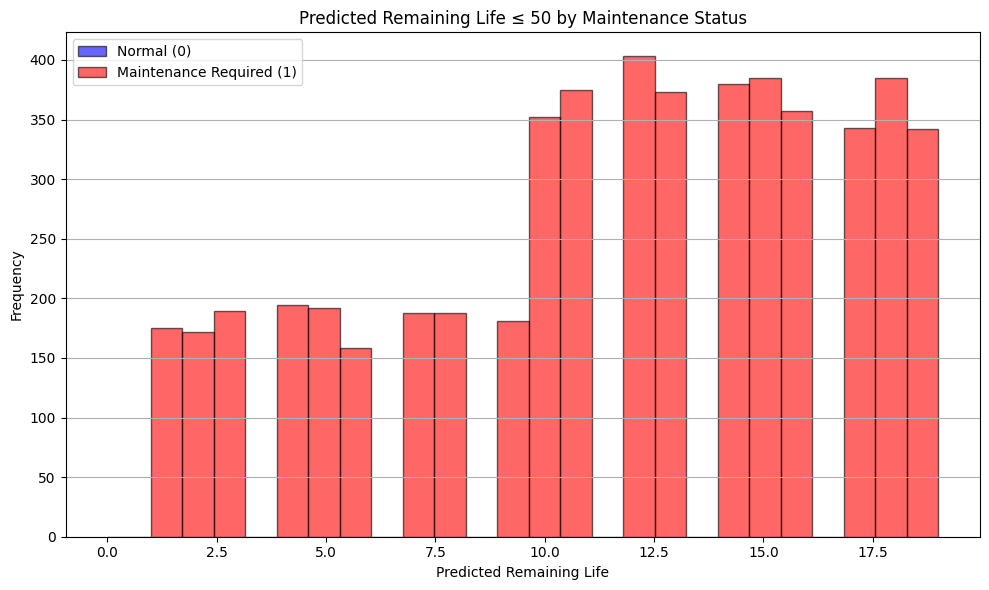

In [ ]:
# 결측치 제거
df = df.dropna(subset=['predicted_remaining_life'])

# 수명 ≤ 50인 데이터만 필터링
filtered_df = df[df['predicted_remaining_life'] < 20]

# 상태별 분리
normal = filtered_df[filtered_df['maintenance_required'] == 0]['predicted_remaining_life']
maintenance = filtered_df[filtered_df['maintenance_required'] == 1]['predicted_remaining_life']

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
plt.hist(normal, bins=25, alpha=0.6, label='Normal (0)', color='blue', edgecolor='black')
plt.hist(maintenance, bins=25, alpha=0.6, label='Maintenance Required (1)', color='red', edgecolor='black')

plt.title('Predicted Remaining Life ≤ 50 by Maintenance Status')
plt.xlabel('Predicted Remaining Life')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2758956128.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(
/tmp/ipython-input-2758956128.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(
/tmp/ipython-input-2758956128.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(
/tmp/ipython-input-2758956128.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(
/tmp/ipython-input-2758956128.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of

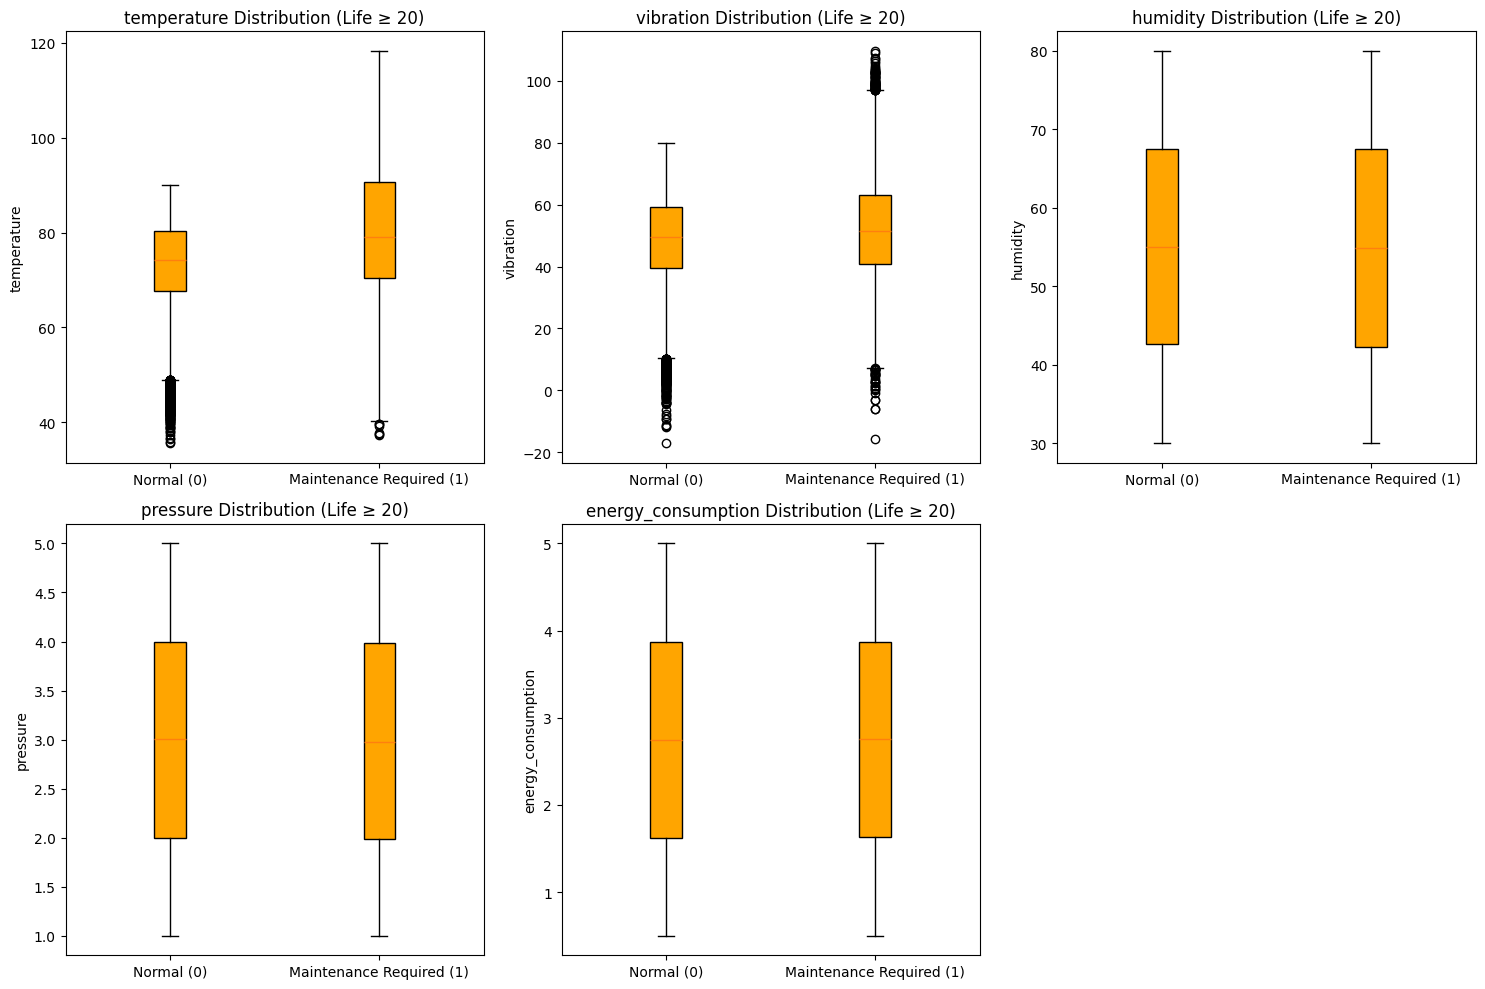

In [ ]:
# 수명 20 이상이면서 상태별로 데이터 분리
exceptions = df[(df['predicted_remaining_life'] >= 20) & (df['maintenance_required'] == 1)]
normal = df[(df['predicted_remaining_life'] >= 20) & (df['maintenance_required'] == 0)]

# 비교할 센서 컬럼
sensor_cols = ['temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption']

# 시각화
plt.figure(figsize=(15, 10))

for i, col in enumerate(sensor_cols, 1):
    plt.subplot(2, 3, i)

    box = plt.boxplot(
        [normal[col], exceptions[col]],
        labels=['Normal (0)', 'Maintenance Required (1)'],
        patch_artist=True
    )

    # 모든 box 색상을 주황색으로 변경
    for patch in box['boxes']:
        patch.set_facecolor('orange')

    plt.title(f'{col} Distribution (Life ≥ 20)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [ ]:
# 온도 임계값 설정
threshold = 90

# 해당 임계값 이상인 데이터만 필터링
subset = df[df['temperature'] > threshold]

# 상태별 개수 세기
count_0 = (subset['maintenance_required'] == 0).sum()
count_1 = (subset['maintenance_required'] == 1).sum()
total = count_0 + count_1

# 정비 필요 비율 계산
maintenance_rate = count_1 / total if total > 0 else 0

# 결과 출력
print(f"🌡 온도 > {threshold}도일 때")
print(f"🔵 정상 상태 개수 (0): {count_0}")
print(f"🔴 정비 필요 개수 (1): {count_1}")
print(f"📊 전체 개수: {total}")
print(f"⚠️ 유지보수 비율: {maintenance_rate:.2%}")


🌡 온도 > 90도일 때
🔵 정상 상태 개수 (0): 0
🔴 정비 필요 개수 (1): 6769
📊 전체 개수: 6769
⚠️ 유지보수 비율: 100.00%


In [ ]:
# 진동 임계값 설정
threshold = 80

# 해당 임계값 이상인 데이터만 필터링
subset = df[df['vibration'] > threshold]

# 상태별 개수 세기
count_0 = (subset['maintenance_required'] == 0).sum()
count_1 = (subset['maintenance_required'] == 1).sum()
total = count_0 + count_1

# 정비 필요 비율 계산
maintenance_rate = count_1 / total if total > 0 else 0

# 결과 출력
print(f"🌡 진동 > {threshold}일 때")
print(f"🔵 정상 상태 개수 (0): {count_0}")
print(f"🔴 정비 필요 개수 (1): {count_1}")
print(f"📊 전체 개수: {total}")
print(f"⚠️ 유지보수 비율: {maintenance_rate:.2%}")


🌡 진동 > 80일 때
🔵 정상 상태 개수 (0): 0
🔴 정비 필요 개수 (1): 2284
📊 전체 개수: 2284
⚠️ 유지보수 비율: 100.00%


In [ ]:
# 수명 임계값 설정
threshold = 20

# 해당 임계값 이상인 데이터만 필터링
subset = df[df['predicted_remaining_life'] < threshold]

# 상태별 개수 세기
count_0 = (subset['maintenance_required'] == 0).sum()
count_1 = (subset['maintenance_required'] == 1).sum()
total = count_0 + count_1

# 정비 필요 비율 계산
maintenance_rate = count_1 / total if total > 0 else 0

# 결과 출력
print(f"🌡 수명 < {threshold}일 때")
print(f"🔵 정상 상태 개수 (0): {count_0}")
print(f"🔴 정비 필요 개수 (1): {count_1}")
print(f"📊 전체 개수: {total}")
print(f"⚠️ 유지보수 비율: {maintenance_rate:.2%}")


🌡 수명 < 20일 때
🔵 정상 상태 개수 (0): 0
🔴 정비 필요 개수 (1): 5332
📊 전체 개수: 5332
⚠️ 유지보수 비율: 100.00%


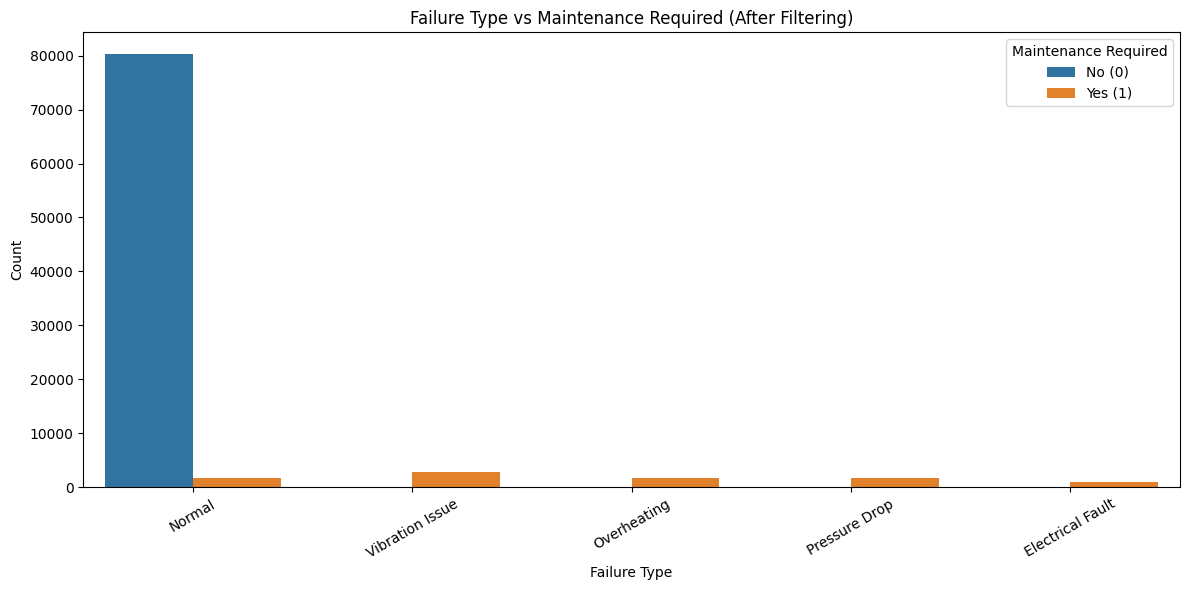

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] > 90) |
    (df['vibration'] > 80) |
    (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()

# ③ 결측치 처리 (downtime_risk 안정성 확보)
remaining_df['downtime_risk'] = remaining_df['downtime_risk'].fillna(0)

# ④ 시각화용: maintenance_required를 문자열로 변환
remaining_df['maintenance_required'] = remaining_df['maintenance_required'].astype(str)

# ⑤ 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=remaining_df, x='failure_type', hue='maintenance_required')

# ⑥ 꾸미기
plt.title('Failure Type vs Maintenance Required (After Filtering)')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.legend(title='Maintenance Required', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


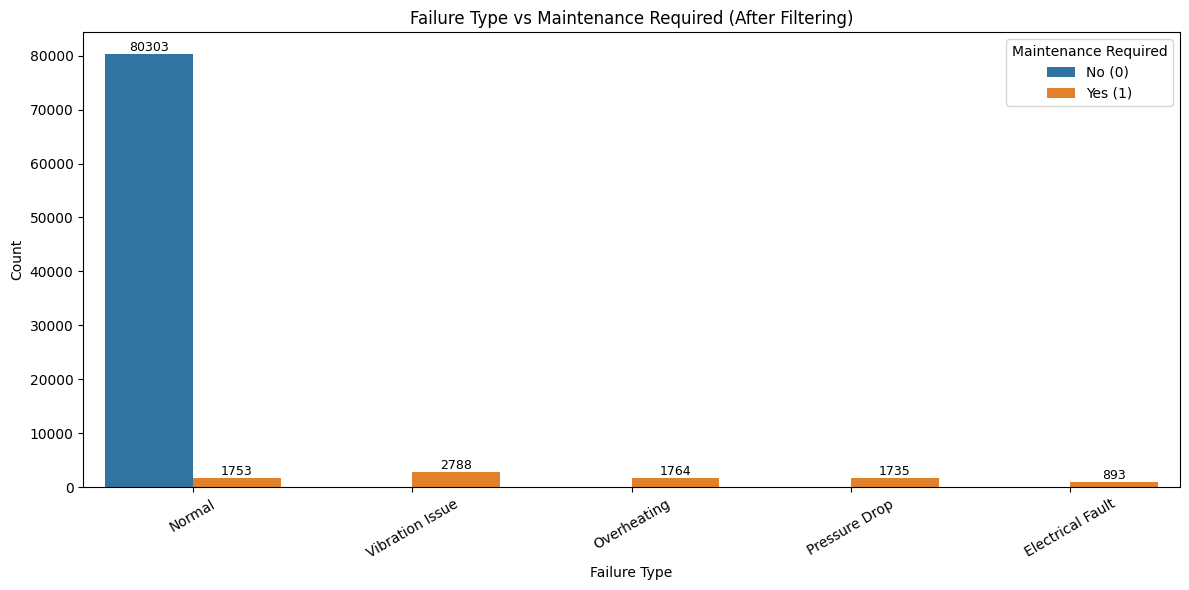

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] > 90) |
    (df['vibration'] > 80) |
    (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터
remaining_df = df[~exclude_condition].copy()

# ③ 결측치 처리
remaining_df['downtime_risk'] = remaining_df['downtime_risk'].fillna(0)

# ④ maintenance_required를 문자열로 변환
remaining_df['maintenance_required'] = remaining_df['maintenance_required'].astype(str)

# ⑤ 시각화
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=remaining_df, x='failure_type', hue='maintenance_required')

# 👉 ⑥ 각 막대 위에 개수 숫자 표시
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

# ⑦ 꾸미기
plt.title('Failure Type vs Maintenance Required (After Filtering)')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.legend(title='Maintenance Required', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] > 90) |
    (df['vibration'] > 80) |
    (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()

# remaining_df 안에서 maintenance_required 값 카운트
counts = remaining_df['maintenance_required'].value_counts()
print(counts)

# 'Normal' + 유지보수 필요 없음(0) 조건을 동시에 만족하는 데이터 개수
normal_and_no_maintenance = remaining_df[
    (remaining_df['failure_type'] == 'Normal') &
    (remaining_df['maintenance_required'] == 0)
].shape[0]

print(f"'Normal' & 유지보수 필요 없음 (0) 개수: {normal_and_no_maintenance}")



maintenance_required
0    80303
1     8933
Name: count, dtype: int64
'Normal' & 유지보수 필요 없음 (0) 개수: 80303


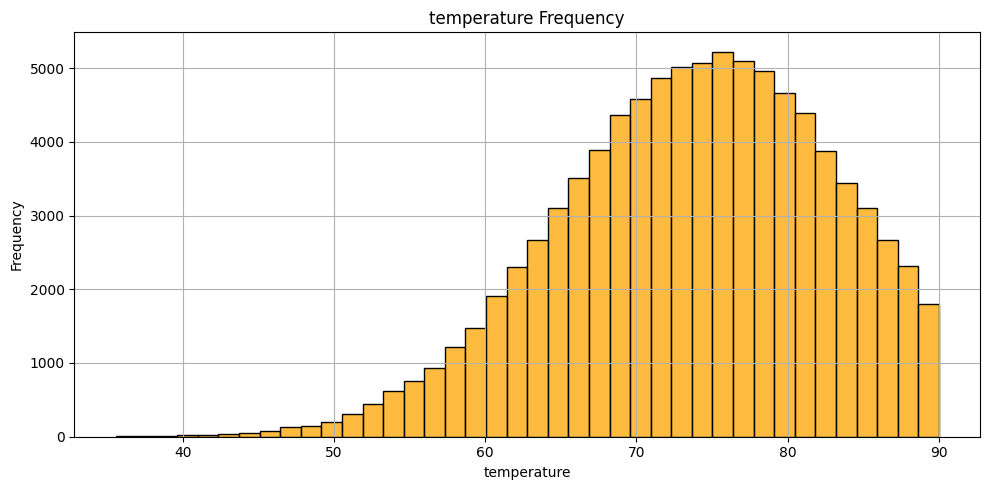

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] > 90) |
    (df['vibration'] > 80) |
    (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()

# ③ 'Overheating'인 데이터만 필터링
overheating_df = remaining_df[remaining_df['failure_type'] == 'Overheating']

# ④ 온도 히스토그램 시각화
plt.figure(figsize=(10, 5))
sns.histplot(data=overheating_df, x='temperature', bins=40, color='orange', edgecolor='black')

# ⑤ 꾸미기
plt.title('Temperature Frequency (Failure Type = Overheating)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

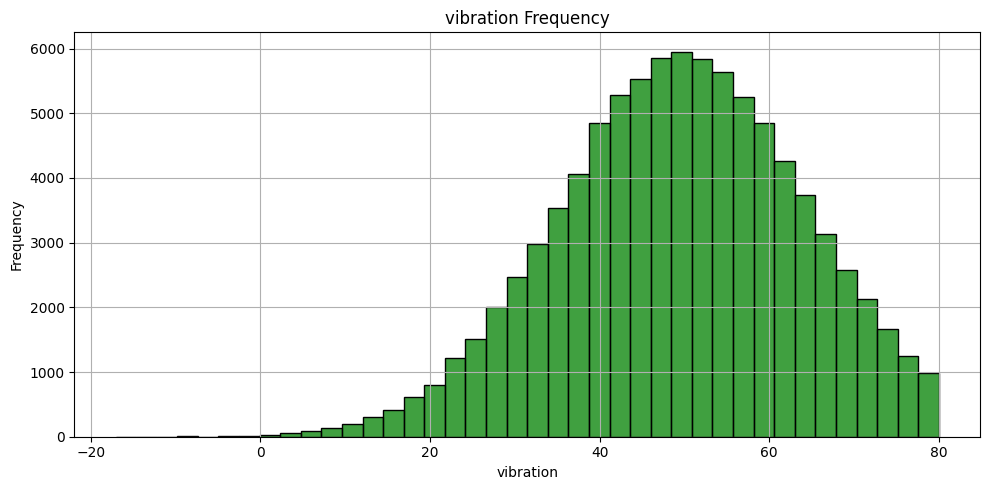

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] > 90) |
    (df['vibration'] > 80) |
    (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()


# ④ 온도 히스토그램 시각화
plt.figure(figsize=(10, 5))
sns.histplot(data=remaining_df, x='vibration', bins=40, color='green', edgecolor='black')

# ⑤ 꾸미기
plt.title('vibration Frequency')
plt.xlabel('vibration')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

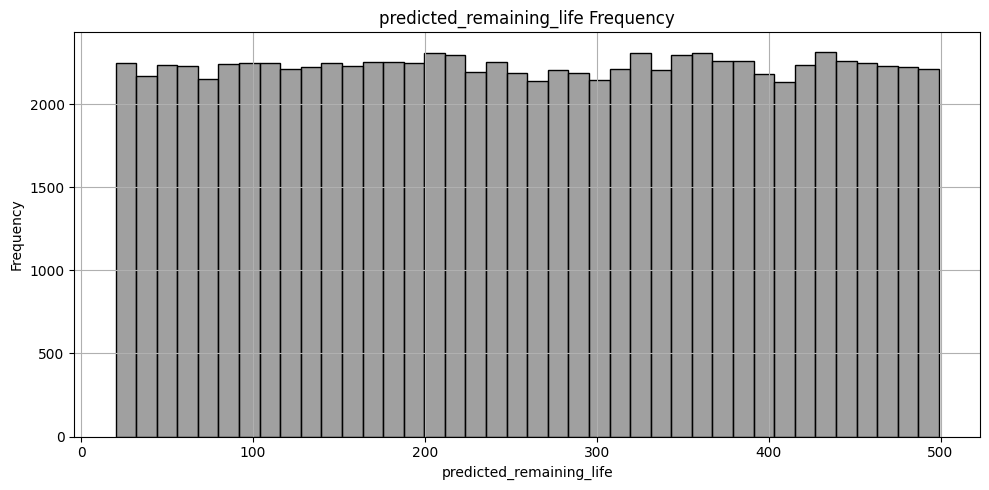

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] > 90) |
    (df['vibration'] > 80) |
    (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()


# ④ 온도 히스토그램 시각화
plt.figure(figsize=(10, 5))
sns.histplot(data=remaining_df, x='predicted_remaining_life', bins=40, color='gray', edgecolor='black')

# ⑤ 꾸미기
plt.title('predicted_remaining_life Frequency')
plt.xlabel('predicted_remaining_life')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

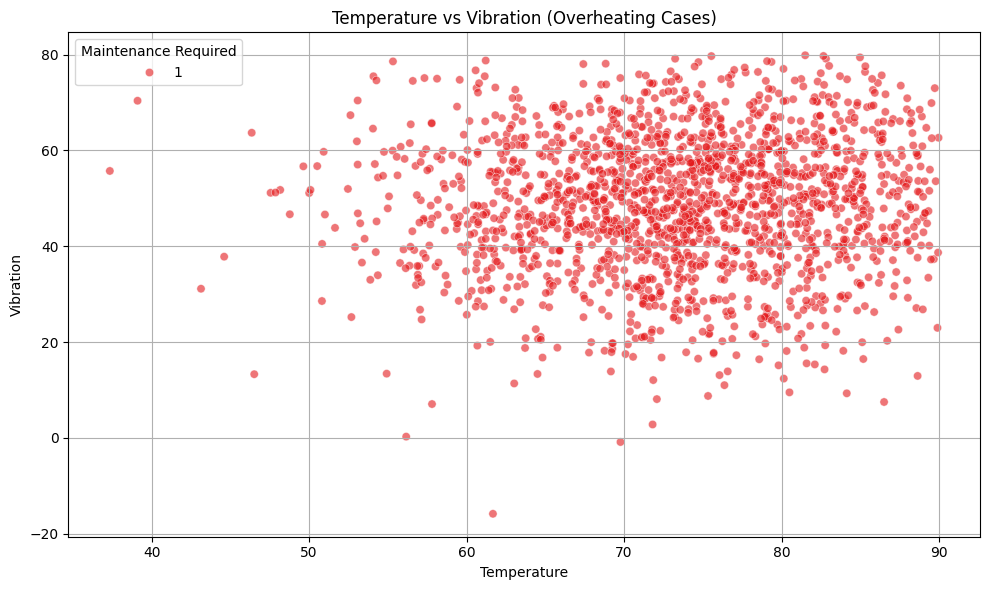

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] > 90) |
    (df['vibration'] > 80) |
    (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()

# ③ Overheating만 필터링
overheating_df = remaining_df[remaining_df['failure_type'] == 'Overheating'].copy()

# ④ 유지보수 여부를 문자열로 변환 (시각화용)
overheating_df['maintenance_required'] = overheating_df['maintenance_required'].astype(str)

# ⑤ 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=overheating_df,
    x='temperature',
    y='vibration',
    hue='maintenance_required',
    palette='Set1',
    alpha=0.6
)

# ⑥ 그래프 꾸미기
plt.title('Temperature vs Vibration (Overheating Cases)')
plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.legend(title='Maintenance Required')
plt.grid(True)
plt.tight_layout()
plt.show()


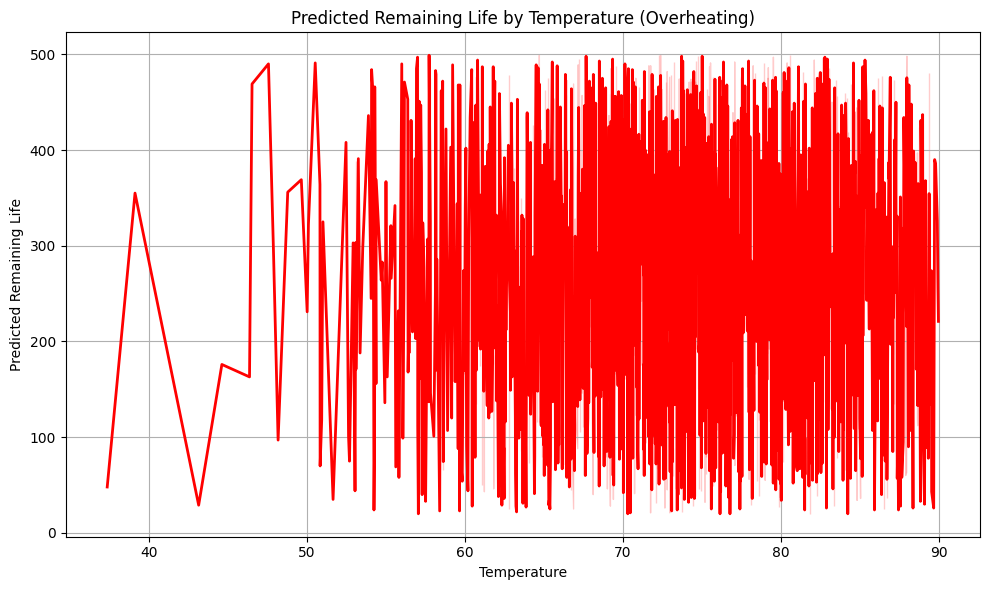

In [ ]:

# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] > 90) |
    (df['vibration'] > 80) |
    (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터
remaining_df = df[~exclude_condition].copy()

# ③ 'Overheating'인 데이터만 필터링
overheating_df = remaining_df[remaining_df['failure_type'] == 'Overheating'].copy()

# ④ 온도를 기준으로 정렬
overheating_df = overheating_df.sort_values(by='temperature')

# ⑤ 곡선 그래프: 온도 vs 예측 수명
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=overheating_df,
    x='temperature',
    y='predicted_remaining_life',
    color='red',
    linewidth=2
)

# ⑥ 그래프 꾸미기
plt.title('Predicted Remaining Life by Temperature (Overheating)')
plt.xlabel('Temperature')
plt.ylabel('Predicted Remaining Life')
plt.grid(True)
plt.tight_layout()
plt.show()


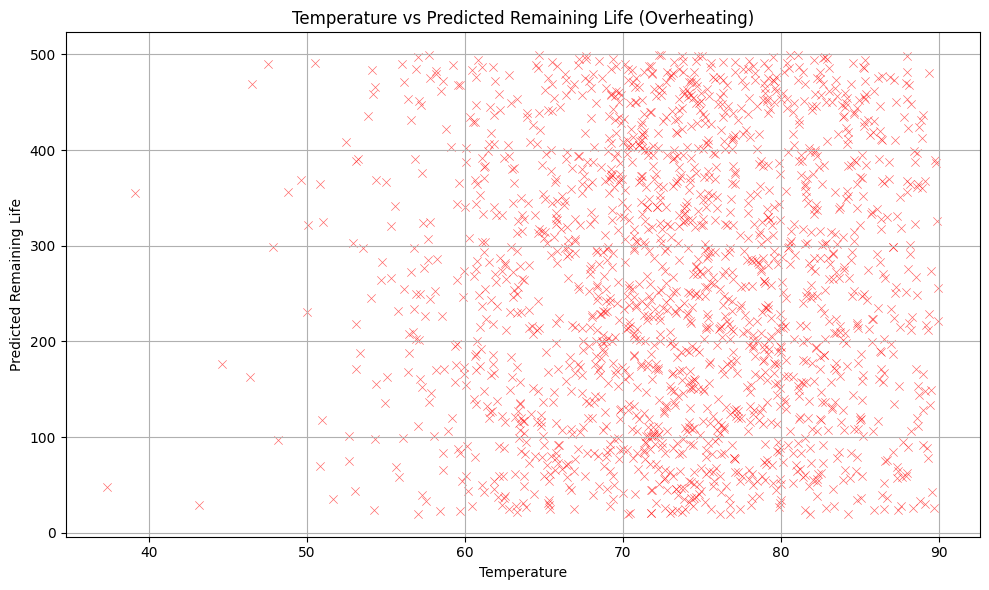

In [ ]:

# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] > 90) |
    (df['vibration'] > 80) |
    (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()

# ③ 'Overheating'인 데이터만 필터링
overheating_df = remaining_df[remaining_df['failure_type'] == 'Overheating'].copy()

# ④ 산점도 시각화: 온도 vs 예측 수명
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=overheating_df,
    x='temperature',
    y='predicted_remaining_life',
    alpha=0.6,
    color='red',
    marker='x'
)

# ⑤ 꾸미기
plt.title('Temperature vs Predicted Remaining Life (Overheating)')
plt.xlabel('Temperature')
plt.ylabel('Predicted Remaining Life')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# ✅ 1. 예외 조건 정의
exception_df = df[
    (df['temperature'] <= 90) &
    (df['vibration'] <= 80) &
    (df['predicted_remaining_life'] >= 20) &
    (df['maintenance_required'] == 1)
]

# ✅ 2. machine_id별 개수 세기
machine_id_counts = exception_df['machine_id'].value_counts().reset_index()
machine_id_counts.columns = ['machine_id', 'count']

# ✅ 3. 결과 출력
print(machine_id_counts)


    machine_id  count
0           23   2092
1           36   2085
2           45   2080
3           30   2074
4           17   2061
5           26   2059
6           48   2058
7           38   2058
8           44   2054
9           21   2052
10          28   2048
11          29   2044
12           5   2043
13           2   2041
14          13   2040
15          18   2031
16          22   2031
17          32   2031
18          15   2027
19          10   2022
20          42   2019
21          41   2013
22          16   2010
23           4   2004
24          19   2004
25           3   2001
26          47   2001
27          40   2001
28          25   1998
29          39   1993
30           9   1991
31          24   1984
32          20   1970
33           8   1967
34           7   1965
35          37   1964
36          27   1957
37          33   1956
38          12   1955
39          11   1951
40          49   1950
41          34   1948
42          14   1941
43           6   1934
44        

In [ ]:
# ① 예외 조건을 만족하면서 정비가 필요한 데이터만 추출
exception_df = df[
    (df['temperature'] <= 90) &
    (df['vibration'] <= 80) &
    (df['predicted_remaining_life'] >= 20) &
    (df['maintenance_required'] == 1)
]

# ② failure_type과 machine_id 조합별 개수 세기 + 정렬
failure_machine_detail_all = (
    exception_df
    .groupby(['failure_type', 'machine_id'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['failure_type', 'count'], ascending=[True, False])  # ✔ 고장유형별로 많이 발생한 기계부터 정렬
)

# ③ 결과 출력
print(failure_machine_detail_all.to_string(index=False))


    failure_type  machine_id  count
Electrical Fault          48     31
Electrical Fault          16     29
Electrical Fault           9     27
Electrical Fault          28     27
Electrical Fault          30     26
Electrical Fault          17     25
Electrical Fault          15     24
Electrical Fault          34     24
Electrical Fault          40     24
Electrical Fault          50     24
Electrical Fault           5     23
Electrical Fault          22     23
Electrical Fault          38     23
Electrical Fault           6     22
Electrical Fault           8     22
Electrical Fault          18     22
Electrical Fault          25     22
Electrical Fault          26     22
Electrical Fault          33     22
Electrical Fault          39     22
Electrical Fault           7     21
Electrical Fault          12     21
Electrical Fault          35     21
Electrical Fault          47     21
Electrical Fault           1     20
Electrical Fault          20     20
Electrical Fault          23

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] >= 90) |
    (df['vibration'] >= 80) |
    (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()

# ③ 유지보수가 필요한 데이터만 필터링
filtered_df = remaining_df[remaining_df['maintenance_required'] == 1]

# ④ machine_status별 개수 세기
machine_status_counts = filtered_df['machine_status'].value_counts().sort_index()

# ⑤ 결과 출력
print(machine_status_counts)


machine_status
2    8929
Name: count, dtype: int64


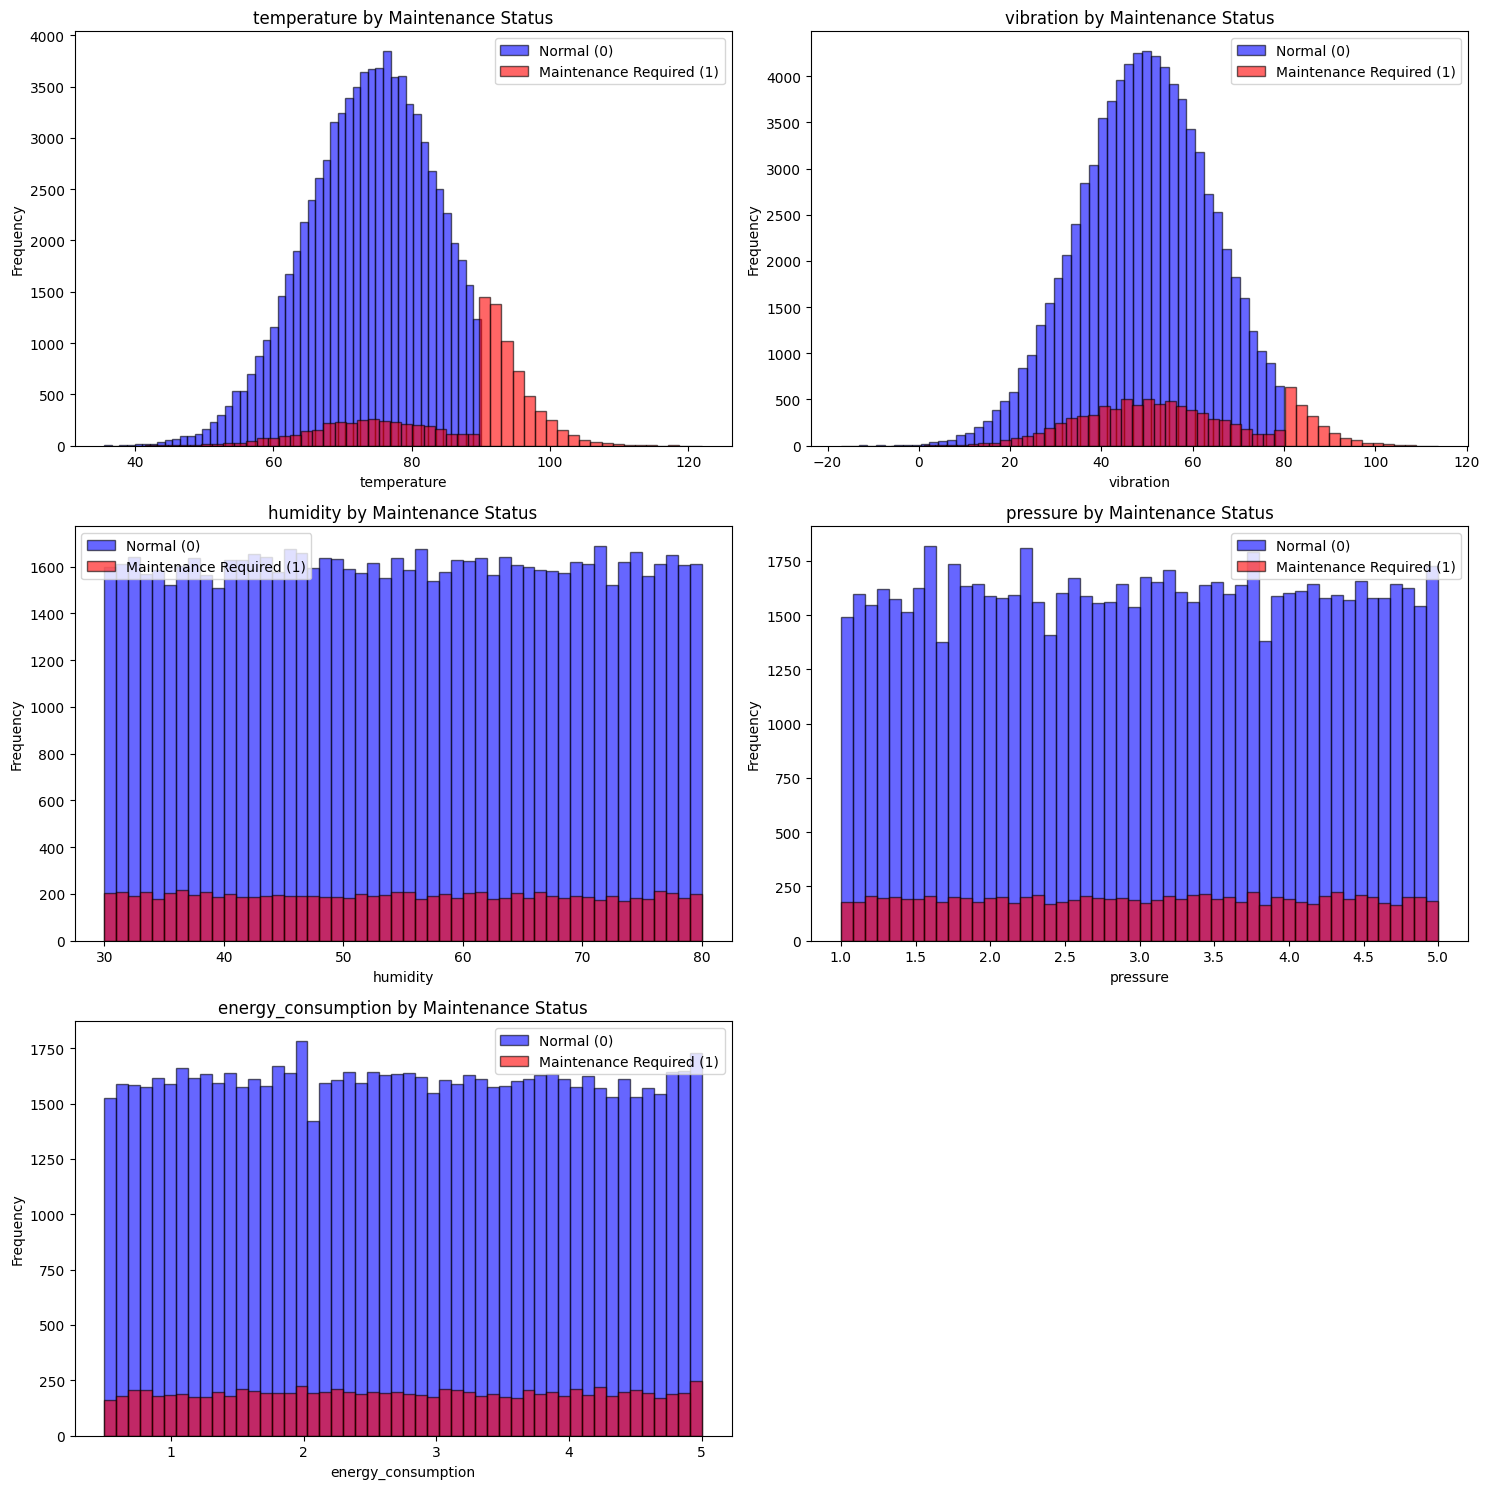

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['machine_status'] == 2)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()

# 시각화 설정
plt.figure(figsize=(15, 15))

for i, col in enumerate(sensor_columns, 1):
    plt.subplot(3, 2, i)

    # 정상(0), 정비 필요(1) 데이터 나누기
    normal = remaining_df[remaining_df['maintenance_required'] == 0][col]
    maintenance = remaining_df[remaining_df['maintenance_required'] == 1][col]

    # 히스토그램 그리기
    plt.hist(normal, bins=50, alpha=0.6, label='Normal (0)', color='blue', edgecolor='black')
    plt.hist(maintenance, bins=50, alpha=0.6, label='Maintenance Required (1)', color='red', edgecolor='black')

    plt.title(f'{col} by Maintenance Status')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


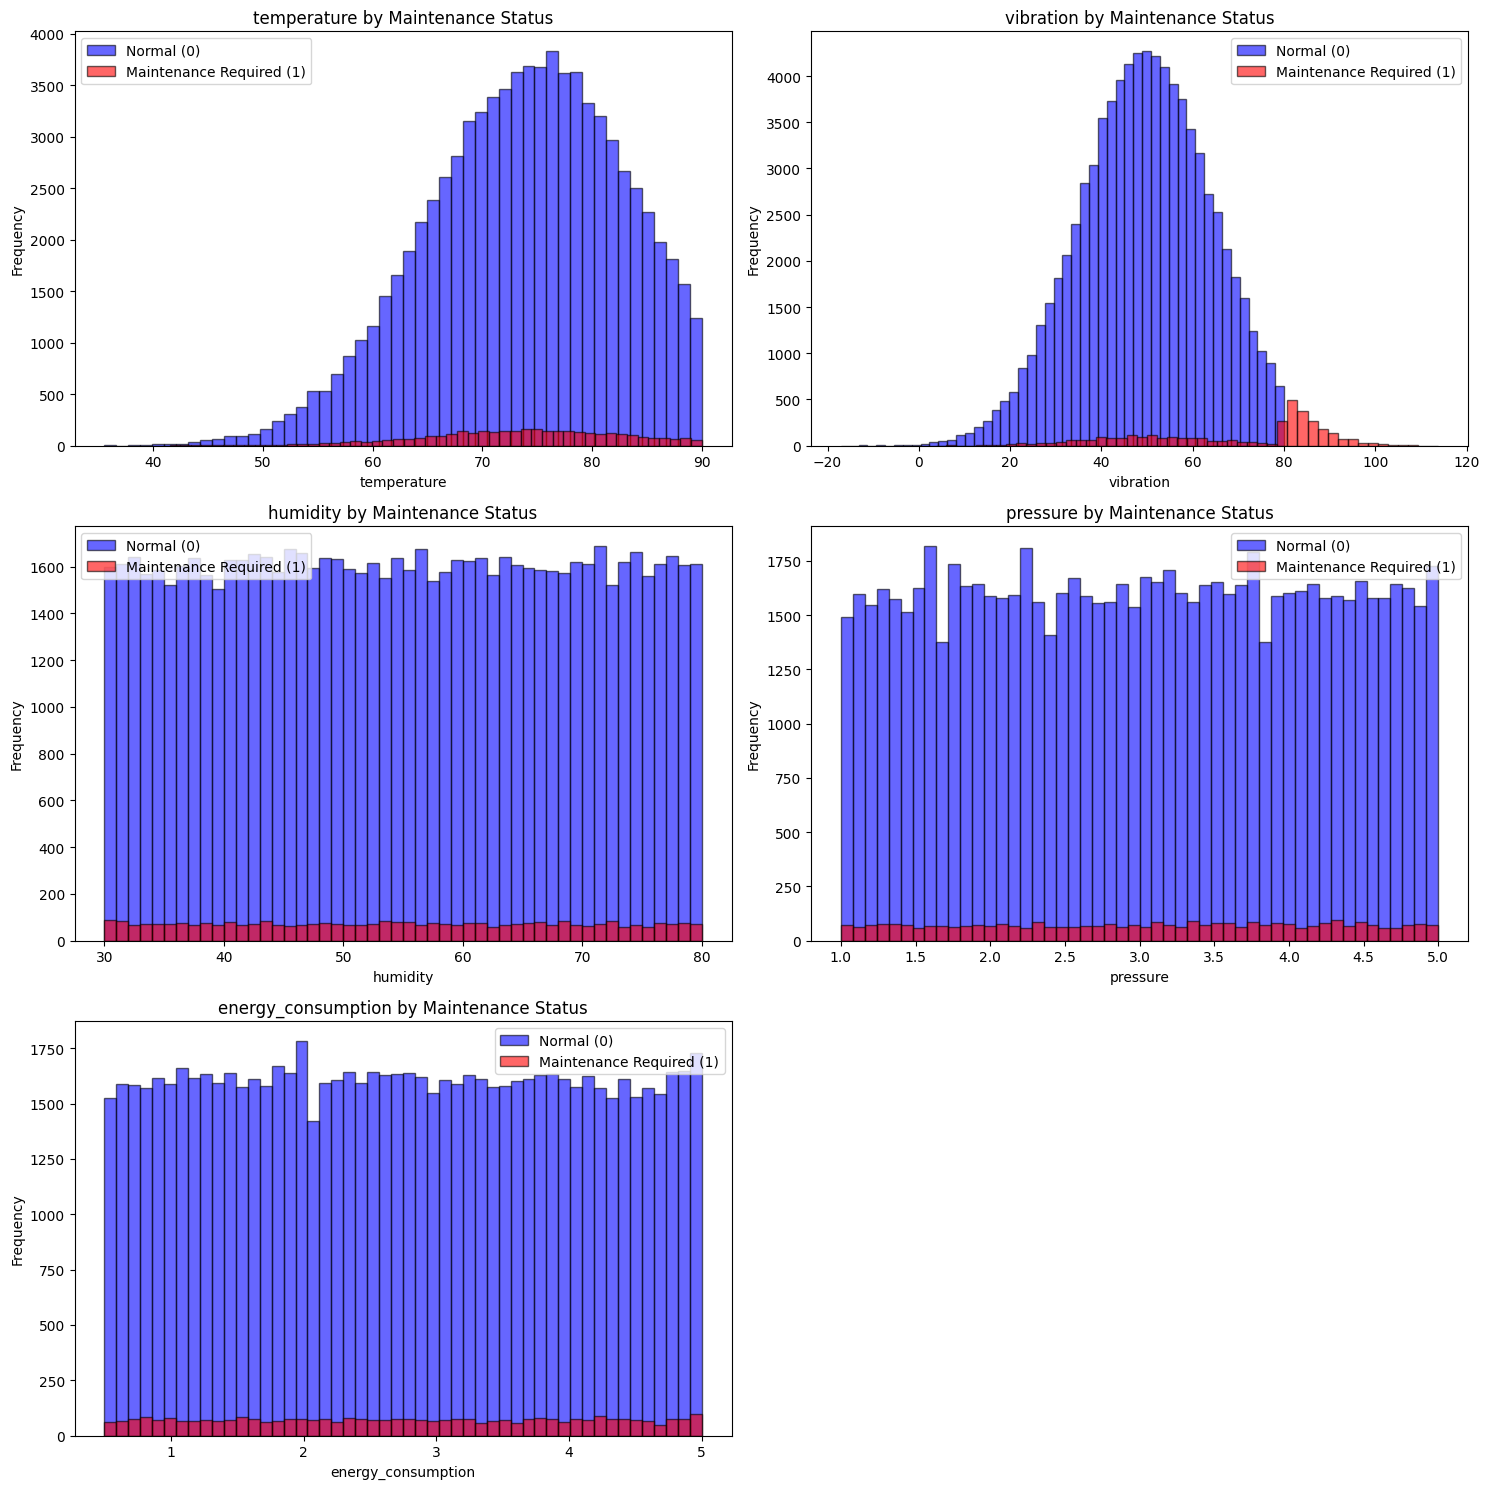

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['machine_status'] == 2) |
    (df['temperature'] >= 90)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()

# 시각화 설정
plt.figure(figsize=(15, 15))

for i, col in enumerate(sensor_columns, 1):
    plt.subplot(3, 2, i)

    # 정상(0), 정비 필요(1) 데이터 나누기
    normal = remaining_df[remaining_df['maintenance_required'] == 0][col]
    maintenance = remaining_df[remaining_df['maintenance_required'] == 1][col]

    # 히스토그램 그리기
    plt.hist(normal, bins=50, alpha=0.6, label='Normal (0)', color='blue', edgecolor='black')
    plt.hist(maintenance, bins=50, alpha=0.6, label='Maintenance Required (1)', color='red', edgecolor='black')

    plt.title(f'{col} by Maintenance Status')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


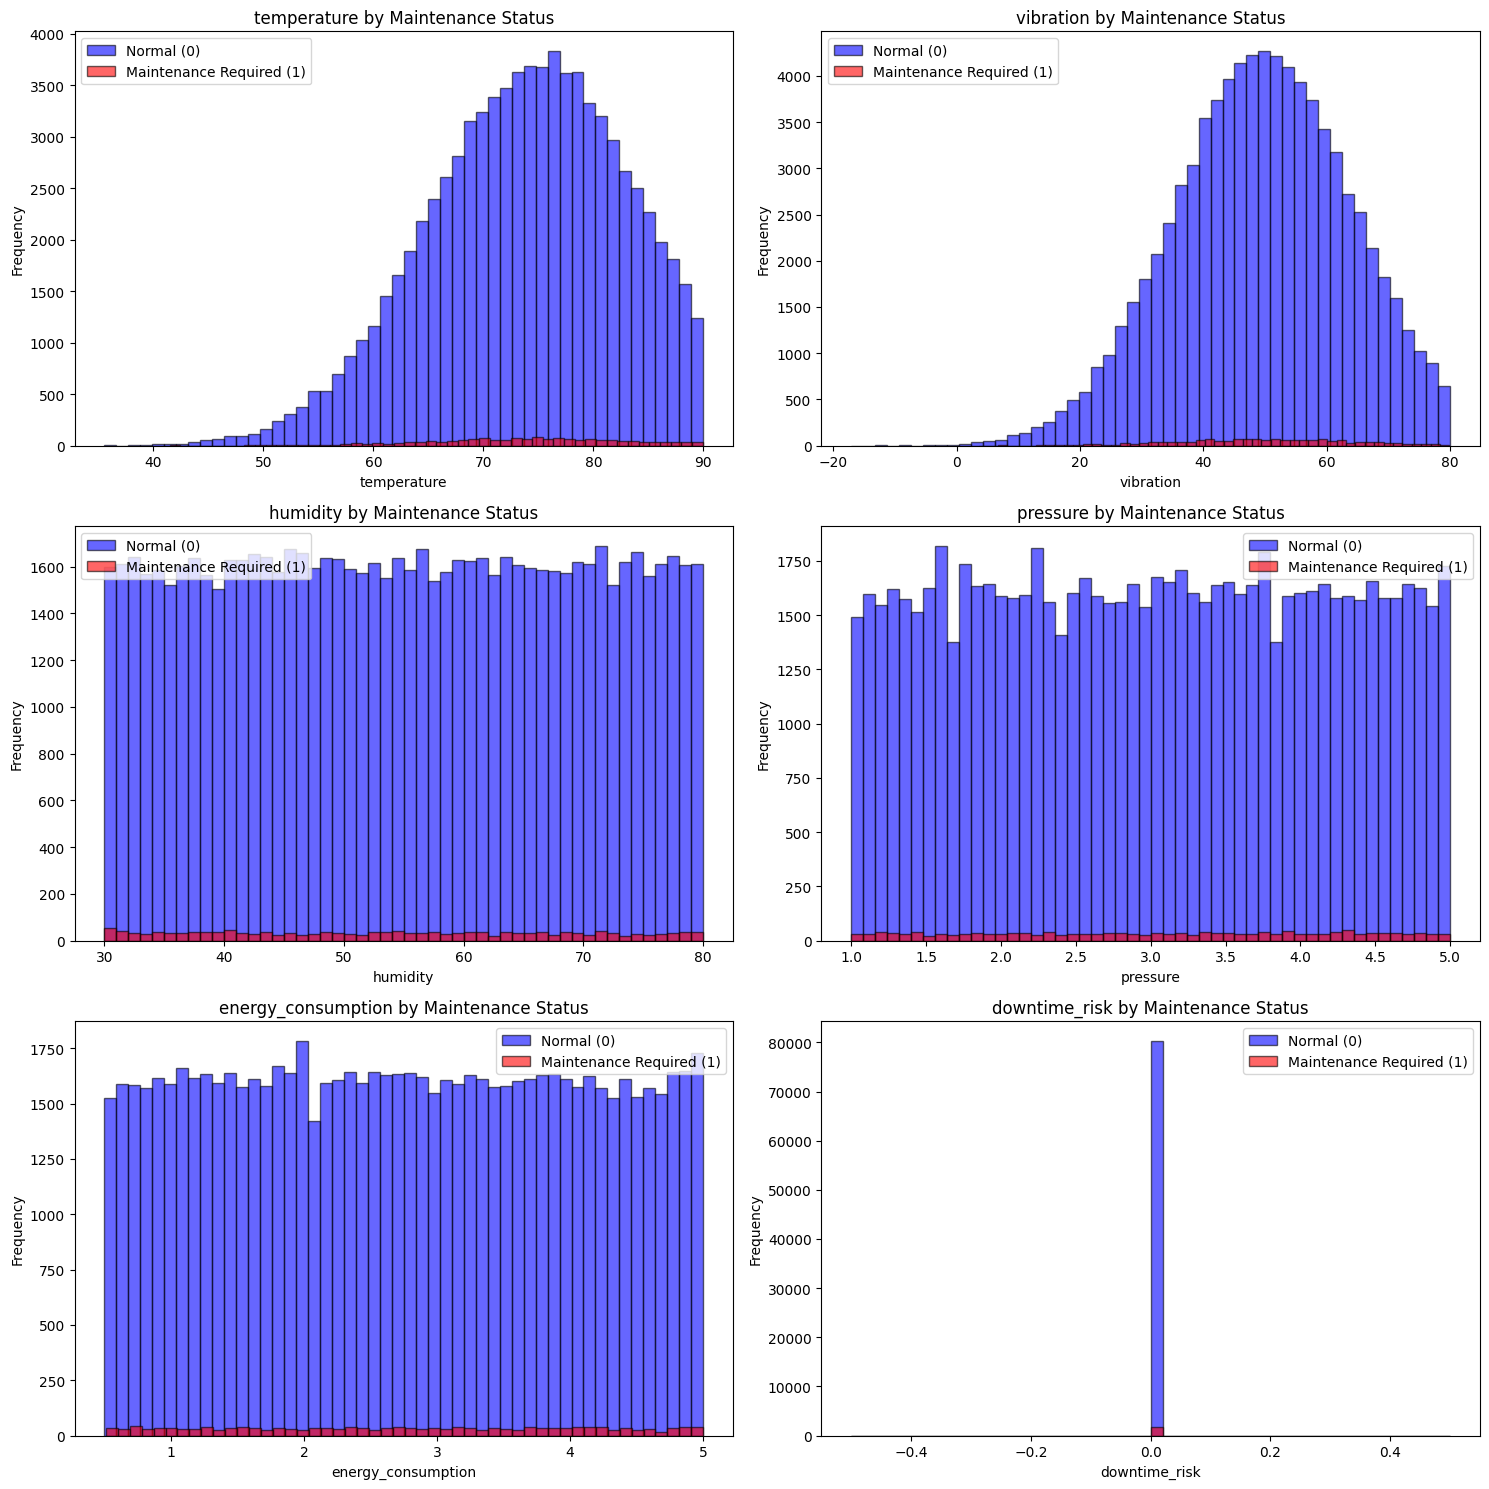

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['machine_status'] == 2) |
    (df['temperature'] >= 90) |
    (df['vibration'] >= 80)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()

# 시각화 설정
plt.figure(figsize=(15, 15))

for i, col in enumerate(sensor_columns, 1):
    plt.subplot(3, 2, i)

    # 정상(0), 정비 필요(1) 데이터 나누기
    normal = remaining_df[remaining_df['maintenance_required'] == 0][col]
    maintenance = remaining_df[remaining_df['maintenance_required'] == 1][col]

    # 히스토그램 그리기
    plt.hist(normal, bins=50, alpha=0.6, label='Normal (0)', color='blue', edgecolor='black')
    plt.hist(maintenance, bins=50, alpha=0.6, label='Maintenance Required (1)', color='red', edgecolor='black')

    plt.title(f'{col} by Maintenance Status')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


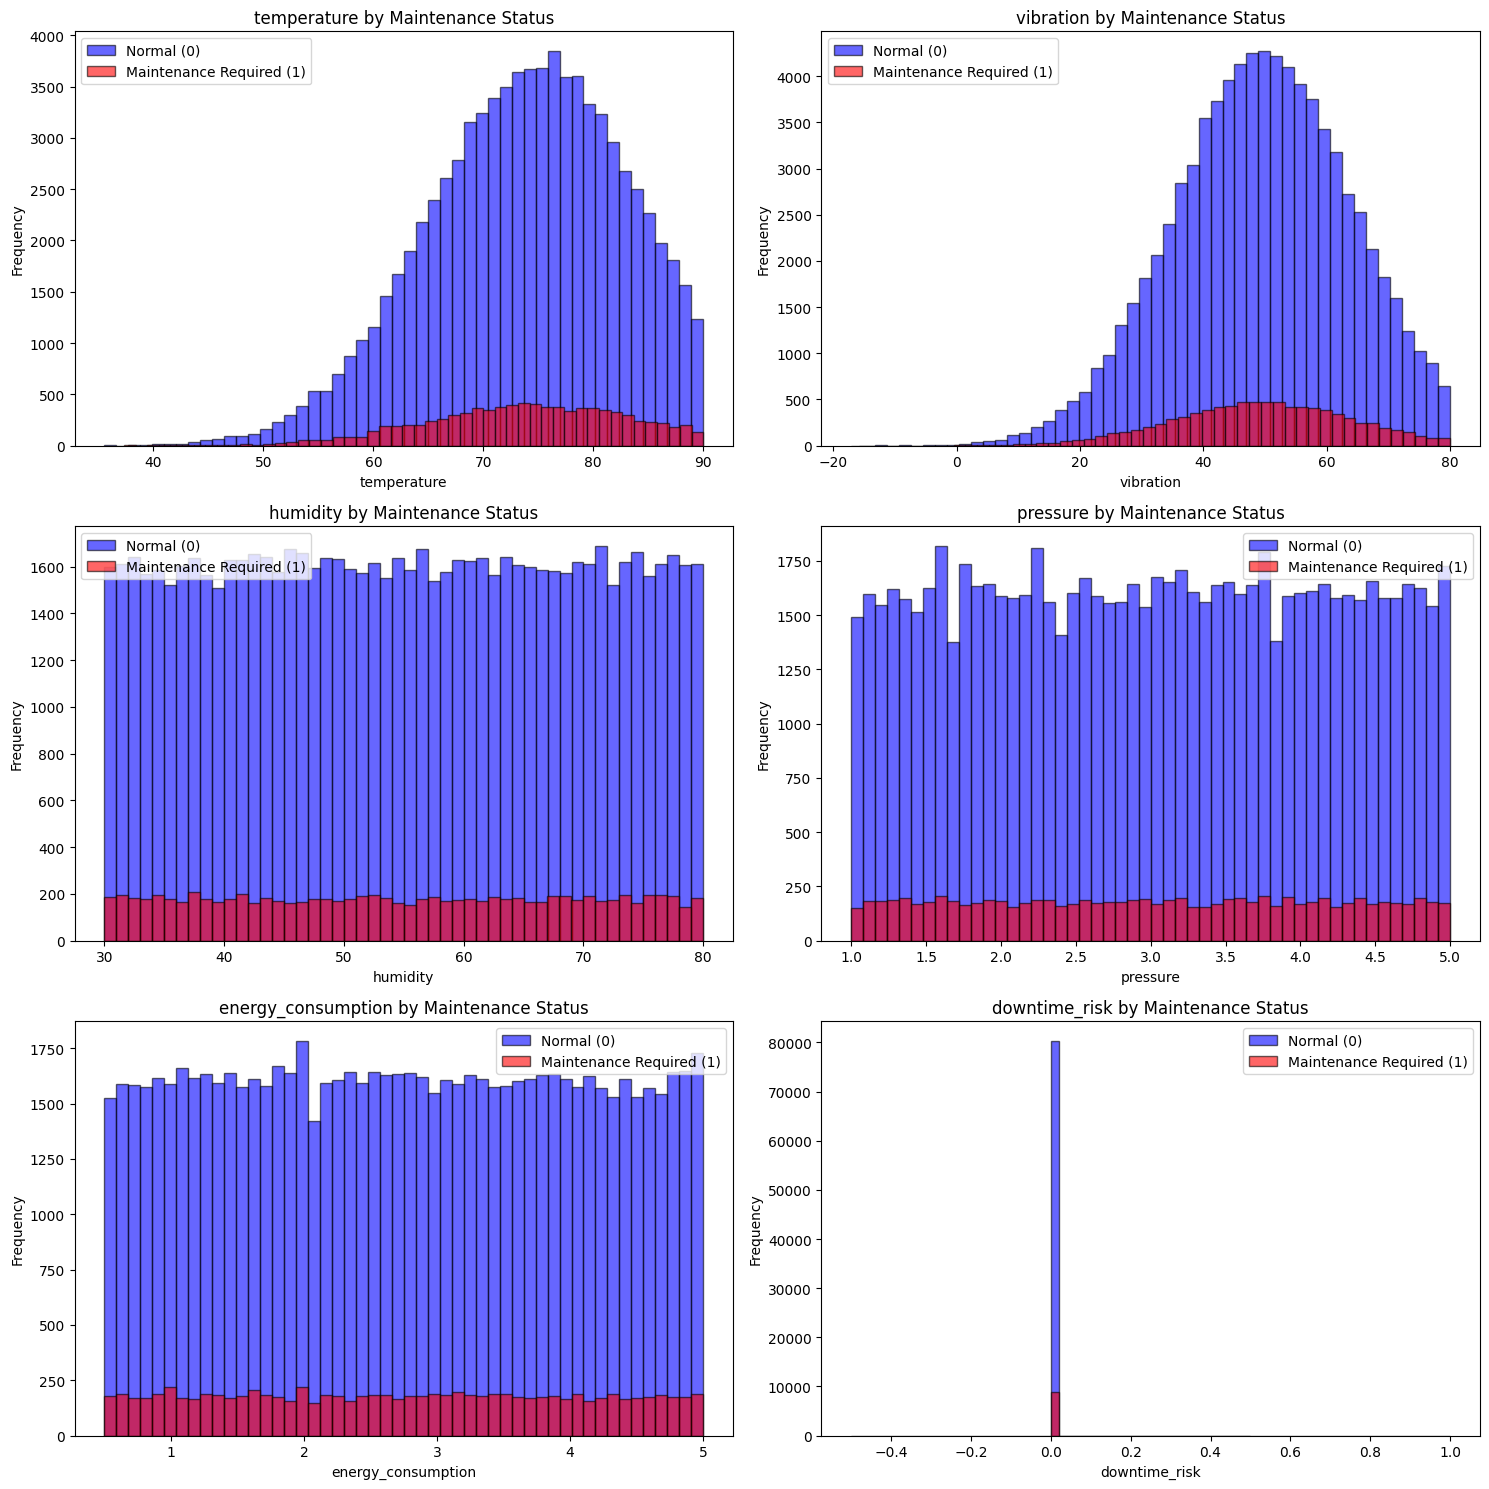

In [ ]:
# ① 제외 조건 정의
exclude_condition = (
    (df['temperature'] > 90) |
    (df['vibration'] > 80) |
     (df['predicted_remaining_life'] < 20)
)

# ② 제외 조건을 제거한 데이터만 추출
remaining_df = df[~exclude_condition].copy()

# 시각화 설정
plt.figure(figsize=(15, 15))

for i, col in enumerate(sensor_columns, 1):
    plt.subplot(3, 2, i)

    # 정상(0), 정비 필요(1) 데이터 나누기
    normal = remaining_df[remaining_df['maintenance_required'] == 0][col]
    maintenance = remaining_df[remaining_df['maintenance_required'] == 1][col]

    # 히스토그램 그리기
    plt.hist(normal, bins=50, alpha=0.6, label='Normal (0)', color='blue', edgecolor='black')
    plt.hist(maintenance, bins=50, alpha=0.6, label='Maintenance Required (1)', color='red', edgecolor='black')

    plt.title(f'{col} by Maintenance Status')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


machine_status
2    8929
Name: count, dtype: int64


/tmp/ipython-input-3400733420.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2')


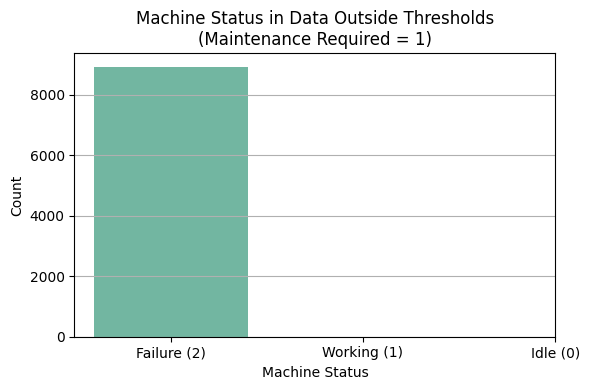

In [ ]:

# 제외 조건 정의
exclude_condition = (
    (df['temperature'] >= 90) |
    (df['vibration'] >= 80) |
    (df['predicted_remaining_life'] < 20)
)

# 조건 통과 + 유지보수 필요한 데이터만
remaining_df = df[~exclude_condition].copy()
filtered_df = remaining_df[remaining_df['maintenance_required'] == 1]

# machine_status별 개수 세기
status_counts = filtered_df['machine_status'].value_counts().sort_index()

print(status_counts)

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2')
plt.title('Machine Status in Data Outside Thresholds\n(Maintenance Required = 1)')
plt.xlabel('Machine Status')
plt.ylabel('Count')
plt.xticks([2, 1, 0], ['Idle (0)', 'Working (1)', 'Failure (2)'])
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# 새 섹션